# Codecademy Data Science Project

## Introduction

&emsp;This project represents my submission for the final project of the __[Codecademy Data Scientist: Machine Learning Specialist Career Path](https://www.codecademy.com/learn/paths/data-science)__. In this Career Path, students go through ~95 hours of study in order to learn how to write code in the Python programming language, analyze data, communicate findings, and draw predictions using machine learning. Students may also earn a professional certification by passing all associated exams within the Career Path.

&emsp;In this project, I analyze data from OKCupid, a dating app that focuses on using multiple-choice and short-answer questions to match users. First, I explore the many differences between male and female users of the app. Then, I attempt to make a machine learning model that can predict if a user is male or female solely based on their answers to the aforementioned questions. \*\*\*Data was provided by Codecademy in the *Machine Learning Portfolio Project* portion of the Career Path.\*\*\*

&emsp;The data from OKCupid is stored in the accompanying file `profiles.csv`. It has the following columns of multiple-choice data:

- body_type
- diet
- drinks
- drugs
- education
- ethnicity
- height
- income
- job
- offspring
- orientation
- pets
- religion
- sex
- sign
- smokes
- speaks
- status

&emsp;And a set of short-answer responses to :

- essay0 - My self-summary
- essay1 - What I’m doing with my life
- essay2 - I’m really good at…
- essay3 - The first thing people usually notice about me…
- essay4 - Favorite books, movies, show, music, and food
- essay5 - The six things I could never do without
- essay6 - I spend a lot of time thinking about…
- essay7 - On a typical Friday night I am…
- essay8 - The most private thing I am willing to admit
- essay9 - You should message me if…

*Go to the Summary portion of this project to skip over code and visualizations*

## Importing Python Modules/Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import iqr
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Importing and Investigating Data

In [2]:
# Import user profile data and save as DataFrame
# then preview data
profile_data = pd.read_csv('profiles.csv')
profile_data.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [3]:
# View important info about data
profile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [4]:
# View more info about data
profile_data.describe(include='all')

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
count,59946.000000,54650,35551,56961,45866,53318,54458,52374,50308,48470,...,59946,24385,59946,40025,39720,59946,48890,54434,59896,59946
unique,NaN,12,18,6,3,32,54350,51516,48635,43533,...,199,15,3,15,45,2,48,5,7647,5
top,NaN,average,mostly anything,socially,never,graduated from college/university,.,enjoying it.,listening,my smile,...,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,agnosticism,m,gemini and it&rsquo;s fun to think about,no,english,single
freq,NaN,14652,16585,41780,37724,23959,12,61,82,529,...,31064,7560,51606,14814,2724,35829,1782,43896,21828,55697
mean,32.340290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.452779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning and Wrangling Data

### Removing Null Data

In [5]:
# Remove users that did not input value for height
# Save as new DataFrame to preserve original data
profile_data_2 = profile_data.dropna(subset='height', ignore_index=True)

In [6]:
# Remove users that did not include ethnicity
profile_data_2 = profile_data_2.dropna(subset='ethnicity', ignore_index=True)

In [7]:
# Remove users that did not input value for religion
profile_data_2 = profile_data_2.dropna(subset='religion', ignore_index=True)

In [8]:
# Remove users that did not input values for drinking, smoking, and drug use
profile_data_2 = profile_data_2.dropna(subset=['drinks', 'drugs', 'smokes'], ignore_index=True)

In [9]:
# Remove users that did not input value for education
profile_data_2 = profile_data_2.dropna(subset='education', ignore_index=True)

In [10]:
# Remove users that did not input value for diet or body type
profile_data_2 = profile_data_2.dropna(subset=['diet', 'body_type'], ignore_index=True)

In [11]:
# Remove users that did not input value for job
profile_data_2 = profile_data_2.dropna(subset='job', ignore_index=True)

In [12]:
# Remove users that did not input value for offspring
profile_data_2 = profile_data_2.dropna(subset='offspring', ignore_index=True)

In [13]:
# View reported income of users
profile_data_2.income.value_counts()

income
-1          6520
 20000       765
 100000      368
 80000       267
 30000       263
 40000       234
 50000       229
 60000       181
 70000       181
 150000      156
 1000000     108
 250000       36
 500000       14
Name: count, dtype: int64

In [14]:
# Remove users that did not input value for income
profile_data_2 = profile_data_2[profile_data_2.income != -1].reset_index(drop=True)
# Check to see if it worked correctly
profile_data_2.income.value_counts()

income
20000      765
100000     368
80000      267
30000      263
40000      234
50000      229
60000      181
70000      181
150000     156
1000000    108
250000      36
500000      14
Name: count, dtype: int64

### Updating/Adding Parameters

In [15]:
# Update sex parameter to use numbers instead of letters
profile_data_2.sex = profile_data_2.sex.apply(lambda x: 1 if 'm' in x else 0)
# Check to see if it worked correctly
profile_data_2.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,1,cancer,no,"english (fluently), spanish (poorly), french (...",single
1,29,thin,mostly anything,socially,never,working on college/university,NaN,i have an awesome career working as a senior m...,listening. helping others. being patient. comm...,"well, i get the most compliments on my butt, s...",...,"san leandro, california","doesn&rsquo;t have kids, but wants them",straight,likes dogs and has cats,catholicism,0,taurus,no,english,single
2,35,athletic,mostly anything,socially,sometimes,graduated from space camp,"i'm an <a class=""ilink"" href=\n""/interests?i=a...","photography, lights, and sound. i also throw s...",pretty much anything i put my mind to...<br />...,i have laser beams coming out of my eyes.,...,"emeryville, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,1,pisces and it&rsquo;s fun to think about,no,"english (poorly), spanish (poorly)",single
3,31,curvy,mostly anything,socially,never,graduated from law school,i'm an easy-going person with a genuine apprec...,"writing, performing/composing music, watching ...","whistling, writing, doing three-point turns, c...","well, that depends more on you than on me. wha...",...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,NaN,hinduism but not too serious about it,0,libra and it&rsquo;s fun to think about,no,"english (fluently), hindi (okay), spanish (poo...",single
4,29,fit,mostly anything,socially,sometimes,graduated from college/university,"my names josh, and i create art for a living. ...",living it,everything,i honestly couldn't say....,...,"san francisco, california",doesn&rsquo;t want kids,straight,likes dogs and likes cats,agnosticism and very serious about it,1,libra,no,english (fluently),single


In [16]:
# Create age group parameter for further analysis
age_ranges = [18, 20, 30, 40, 50, 60, 70, 80, 90, 100, 111]
profile_data_2['age_group'] = pd.cut(profile_data_2.age, 
                                     age_ranges, 
                                     right=False,
                                     labels=['18-19', '20-29',
                                     '30-39', '40-49', '50-59',
                                     '60-69', '70-79', '80-89',
                                     '90-99', '100-110'])
profile_data_2[['age', 'age_group']].head(20)

,age,age_group
0,35,30-39
1,29,20-29
2,35,30-39
3,31,30-39
4,29,20-29
5,23,20-29
6,21,20-29
7,50,50-59
8,59,50-59
9,26,20-29


In [17]:
# View ethnicity of users
profile_data_2.ethnicity.value_counts()

ethnicity
white                                                                                               1727
asian                                                                                                230
black                                                                                                139
hispanic / latin                                                                                     123
other                                                                                                 94
                                                                                                    ... 
native american, hispanic / latin, white, other                                                        1
indian, white, other                                                                                   1
middle eastern, hispanic / latin, white                                                                1
asian, middle eastern, black, native american

In [18]:
# Create binary parameter that equals 1 if user included black in ethnicity
profile_data_2['is_black'] = profile_data_2.ethnicity.apply(lambda x: 1 if 'black' in x else 0)
# View a random slice of DataFrame to see if it worked correctly
profile_data_2.iloc[41:50, 16:]

,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,age_group,is_black
41,white,68.0,60000,entertainment / media,2012-06-26-09-44,"san francisco, california",doesn&rsquo;t want kids,straight,likes dogs and has cats,other,1,scorpio,trying to quit,"english, japanese",single,20-29,0
42,pacific islander,68.0,50000,banking / financial / real estate,2012-06-08-01-21,"san leandro, california",has kids,straight,likes dogs and likes cats,christianity and somewhat serious about it,0,gemini and it&rsquo;s fun to think about,no,"english (fluently), spanish (fluently), hawaii...",single,30-39,0
43,"pacific islander, hispanic / latin",68.0,50000,medicine / health,2012-06-29-23-17,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,has dogs and likes cats,catholicism but not too serious about it,1,capricorn but it doesn&rsquo;t matter,sometimes,"english (fluently), spanish (okay), tagalog (p...",single,20-29,0
44,white,74.0,40000,medicine / health,2012-06-25-11-33,"richmond, california",doesn&rsquo;t have kids,straight,likes dogs,catholicism,1,cancer,no,"english (fluently), croatian (okay)",single,20-29,0
45,white,70.0,20000,sales / marketing / biz dev,2012-05-13-12-52,"novato, california",has kids,straight,NaN,agnosticism and laughing about it,1,aquarius but it doesn&rsquo;t matter,no,"english, french",single,50-59,0
46,black,66.0,40000,artistic / musical / writer,2012-06-29-20-16,"san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,christianity and very serious about it,1,aries but it doesn&rsquo;t matter,sometimes,"english (fluently), spanish (poorly), portugue...",single,20-29,1
47,asian,67.0,20000,other,2012-04-19-22-16,"san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,other and somewhat serious about it,1,sagittarius and it&rsquo;s fun to think about,trying to quit,"english (fluently), chinese (okay), japanese (...",single,20-29,0
48,white,68.0,30000,artistic / musical / writer,2012-06-19-09-15,"san francisco, california","doesn&rsquo;t have kids, and doesn&rsquo;t wan...",straight,likes dogs and likes cats,atheism and very serious about it,1,virgo but it doesn&rsquo;t matter,when drinking,"english (fluently), french (poorly), spanish (...",single,20-29,0
49,white,73.0,150000,science / tech / engineering,2012-06-30-00-45,"oakland, california","doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,other and laughing about it,1,scorpio but it doesn&rsquo;t matter,no,english (poorly),single,30-39,0


In [19]:
# Create binary parameters for all other ethnicities
profile_data_2['is_white'] = profile_data_2.ethnicity.apply(lambda x: 1 if 'white' in x else 0)
profile_data_2['is_asian'] = profile_data_2.ethnicity.apply(lambda x: 1 if 'asian' in x else 0)
profile_data_2['is_hispanic_latin'] = profile_data_2.ethnicity.apply(lambda x: 1 if 'hispanic' in x else 0)
profile_data_2['is_native_american'] = profile_data_2.ethnicity.apply(lambda x: 1 if 'native' in x else 0)
profile_data_2['is_pacific_islander'] = profile_data_2.ethnicity.apply(lambda x: 1 if 'pacific' in x else 0)
profile_data_2['is_indian'] = profile_data_2.ethnicity.apply(lambda x: 1 if 'indian' in x else 0)
profile_data_2['is_middle_eastern'] = profile_data_2.ethnicity.apply(lambda x: 1 if 'middle' in x else 0)
profile_data_2['is_other'] = profile_data_2.ethnicity.apply(lambda x: 1 if 'other' in x else 0)

In [20]:
# Show possible values for religion category
profile_data_2.religion.value_counts()

religion
agnosticism but not too serious about it      201
atheism and laughing about it                 188
christianity but not too serious about it     183
agnosticism and laughing about it             174
other                                         159
other and laughing about it                   156
catholicism but not too serious about it      153
other but not too serious about it            147
agnosticism                                   129
atheism but not too serious about it          114
christianity and somewhat serious about it    110
atheism                                       107
christianity                                  100
judaism but not too serious about it           84
atheism and somewhat serious about it          75
other and somewhat serious about it            65
other and very serious about it                65
atheism and very serious about it              62
christianity and very serious about it         57
catholicism and laughing about it        

In [21]:
# Create parameter that shows if user subscribes to religion or not
profile_data_2['is_religious'] = profile_data_2.religion.apply(lambda x: 0 if any(word in x for word in ['agnosticism', 'atheism']) else 1)
# Check to see if it worked correctly
profile_data_2[['religion', 'is_religious']].head(20)

,religion,is_religious
0,agnosticism but not too serious about it,0
1,catholicism,1
2,agnosticism and very serious about it,0
3,hinduism but not too serious about it,1
4,agnosticism and very serious about it,0
5,other,1
6,atheism and laughing about it,0
7,other,1
8,other,1
9,catholicism and laughing about it,1


In [22]:
# View drinking habit of users
profile_data_2.drinks.value_counts()

drinks
socially       1827
rarely          378
often           278
not at all      236
very often       59
desperately      24
Name: count, dtype: int64

In [23]:
# Create parameter that shows if user drinks or not
profile_data_2['is_drinker'] = profile_data_2.drinks.apply(lambda x: 0 if 'not at all' in x else 1)

In [24]:
# View smoking habit of users
profile_data_2.smokes.value_counts()

smokes
no                2110
sometimes          225
when drinking      178
yes                167
trying to quit     122
Name: count, dtype: int64

In [25]:
# Create parameter that shows if user smokes or not
profile_data_2['is_smoker'] = profile_data_2.smokes.apply(lambda x: 0 if 'no' in x else 1)

In [26]:
# View drug habit of users
profile_data_2.drugs.value_counts()

drugs
never        2099
sometimes     640
often          63
Name: count, dtype: int64

In [27]:
# Create parameter that shows if user uses drugs or not
profile_data_2['uses_drugs'] = profile_data_2.drugs.apply(lambda x: 0 if 'never' in x else 1)

In [28]:
# View education of users
profile_data_2.education.value_counts()

education
graduated from college/university    1024
graduated from masters program        398
working on college/university         369
graduated from high school            152
graduated from two-year college       147
working on two-year college           124
dropped out of college/university     114
graduated from ph.d program            70
working on masters program             53
dropped out of space camp              47
working on ph.d program                43
graduated from law school              43
graduated from space camp              42
working on space camp                  31
college/university                     24
dropped out of high school             20
dropped out of masters program         18
dropped out of two-year college        17
dropped out of ph.d program            12
two-year college                       10
working on med school                   8
graduated from med school               8
working on high school                  8
high school             

In [29]:
# Create parameter that shows if user graduated high school or not
profile_data_2['post_secondary_edu'] = profile_data_2.education.apply(lambda x: 0 if 'high school' in x else 1)

In [30]:
# View diets of users
profile_data_2.diet.value_counts()

diet
mostly anything        1488
anything                348
strictly anything       341
mostly vegetarian       267
mostly other            110
strictly vegetarian      72
strictly other           45
mostly vegan             32
other                    22
vegetarian               20
strictly vegan           18
mostly kosher            15
vegan                    10
mostly halal              9
strictly kosher           3
strictly halal            1
halal                     1
Name: count, dtype: int64

In [31]:
# Create parameter that shows if user adheres to diet or not
profile_data_2['adheres_to_diet'] = profile_data_2.diet.apply(lambda x: 0 if 'anything' in x else 1)

In [32]:
# View body types of users
profile_data_2.body_type.value_counts()

body_type
average           766
athletic          586
fit               526
curvy             231
a little extra    218
thin              201
skinny             91
full figured       67
overweight         45
jacked             38
used up            30
rather not say      3
Name: count, dtype: int64

In [33]:
# Create parameter that shows if user is fit or not
profile_data_2['is_fit'] = profile_data_2.body_type.apply(lambda x: 1 if any(word in x for word in ['fit', 'athletic', 'jacked']) else 0)

In [34]:
# View jobs of users
profile_data_2.job.value_counts()

job
other                                369
artistic / musical / writer          278
student                              265
computer / hardware / software       263
science / tech / engineering         236
sales / marketing / biz dev          221
education / academia                 191
medicine / health                    164
executive / management               138
entertainment / media                 99
construction / craftsmanship          91
hospitality / travel                  88
banking / financial / real estate     81
law / legal services                  59
political / government                54
clerical / administrative             50
unemployed                            37
retired                               35
transportation                        34
military                              26
rather not say                        23
Name: count, dtype: int64

In [35]:
# Create parameter that shows if user has job or not
profile_data_2['has_job'] = profile_data_2.job.apply(lambda x: 0 if any(word in x for word in ['student', 'rather not say', 'unemployed', 'retired']) else 1)

In [36]:
# View data about offspring of users
profile_data_2.offspring.value_counts()

offspring
doesn&rsquo;t have kids, but might want them           606
doesn&rsquo;t have kids                                582
doesn&rsquo;t have kids, but wants them                438
doesn&rsquo;t want kids                                334
doesn&rsquo;t have kids, and doesn&rsquo;t want any    224
has kids                                               191
has a kid                                              169
has kids, but doesn&rsquo;t want more                   70
has a kid, and might want more                          54
has a kid, but doesn&rsquo;t want more                  45
wants kids                                              24
might want kids                                         21
has kids, and might want more                           19
has a kid, and wants more                               15
has kids, and wants more                                10
Name: count, dtype: int64

In [37]:
# Create parameter that shows if user has a kid or not
profile_data_2['has_kid'] = profile_data_2.offspring.apply(lambda x: 1 if 'has' in x else 0)

In [38]:
# View data about orientation of users
profile_data_2.orientation.value_counts()

orientation
straight    2505
bisexual     155
gay          142
Name: count, dtype: int64

In [39]:
# Create parameters that show if user is straight, gay, bi or not
profile_data_2['is_straight'] = profile_data_2.orientation.apply(lambda x: 1 if 'straight' in x else 0)
profile_data_2['is_gay'] = profile_data_2.orientation.apply(lambda x: 1 if 'gay' in x else 0)
profile_data_2['is_bisexual'] = profile_data_2.orientation.apply(lambda x: 1 if 'bisexual' in x else 0)

In [40]:
# View data about status of users
profile_data_2.status.value_counts()

status
single            2602
available          108
seeing someone      72
married             20
Name: count, dtype: int64

In [41]:
# Create parameter that shows if user is single or not
profile_data_2['is_single'] = profile_data_2.status.apply(lambda x: 1 if 'single' in x else 0)

In [42]:
# View data about user signs
profile_data_2.sign.value_counts()

sign
gemini but it doesn&rsquo;t matter               116
gemini and it&rsquo;s fun to think about         108
cancer but it doesn&rsquo;t matter               108
scorpio and it&rsquo;s fun to think about        102
leo and it&rsquo;s fun to think about            100
libra but it doesn&rsquo;t matter                 99
cancer and it&rsquo;s fun to think about          96
taurus but it doesn&rsquo;t matter                95
sagittarius but it doesn&rsquo;t matter           92
virgo but it doesn&rsquo;t matter                 90
aquarius and it&rsquo;s fun to think about        90
sagittarius and it&rsquo;s fun to think about     89
leo but it doesn&rsquo;t matter                   88
aries and it&rsquo;s fun to think about           88
capricorn but it doesn&rsquo;t matter             87
virgo and it&rsquo;s fun to think about           87
libra and it&rsquo;s fun to think about           86
pisces but it doesn&rsquo;t matter                85
capricorn and it&rsquo;s fun to think abo

In [43]:
# Reduce number of unique values for sign parameter for better analysis
# Drop na values
profile_data_2 = profile_data_2.dropna(subset='sign', ignore_index=True)
# Use function to reduce parameter values to only signs
def update_sign(sign):
    for word in [
        'aries', 'aquarius', 'cancer', 'capricorn',
        'gemini', 'leo', 'libra', 'pisces', 'sagittarius',
        'scorpio', 'taurus', 'virgo']:
        if word in sign:
            return word
    return sign
profile_data_2.sign = profile_data_2.sign.apply(update_sign)
# Save parameter as a categorical type
profile_data_2.sign = profile_data_2.sign.astype('category')
# Check and see if it worked correctly
print(profile_data_2.sign.value_counts())
print(profile_data_2.sign.cat.codes.value_counts())

sign
gemini         256
cancer         255
leo            225
libra          221
sagittarius    221
scorpio        219
taurus         216
virgo          210
aries          201
capricorn      200
pisces         193
aquarius       187
Name: count, dtype: int64
4     256
2     255
5     225
6     221
8     221
9     219
10    216
11    210
1     201
3     200
7     193
0     187
Name: count, dtype: int64


In [44]:
# View info about dates from the data
profile_data_2.describe(include='all')['last_online']

count                 2604
unique                2328
top       2012-06-30-23-27
freq                     4
mean                   NaN
std                    NaN
min                    NaN
25%                    NaN
50%                    NaN
75%                    NaN
max                    NaN
Name: last_online, dtype: object

In [45]:
# Change last_online to a datetime type
profile_data_2.last_online = pd.to_datetime(profile_data_2.last_online, format='%Y-%m-%d-%H-%M')
# View info about dates from the data after updating the type
profile_data_2.describe(include='all')['last_online']

count                              2604
unique                              NaN
top                                 NaN
freq                                NaN
mean      2012-06-06 17:48:21.820276736
min                 2011-07-05 05:23:00
25%                 2012-06-16 13:54:00
50%                 2012-06-28 16:33:00
75%                 2012-06-30 09:16:30
max                 2012-07-01 08:56:00
std                                 NaN
Name: last_online, dtype: object

### Centering Data

In [46]:
# Instantiate MinMaxScaler and 
# StandardScaler to normalize/standardize a few parameters
mm_scaler = MinMaxScaler()
std_scaler = StandardScaler()

In [47]:
# Normalize age parameter
profile_data_2['age_centered'] = mm_scaler.fit_transform(np.array(profile_data_2.age).reshape(-1,1))
# View changes
profile_data_2.iloc[:5,-5:]

,is_straight,is_gay,is_bisexual,is_single,age_centered
0,1,0,0,1,0.333333
1,1,0,0,1,0.215686
2,1,0,0,1,0.333333
3,1,0,0,1,0.254902
4,1,0,0,1,0.215686


In [48]:
# Standardize height parameter because it has outliers
profile_data_2['height_centered'] = std_scaler.fit_transform(np.array(profile_data_2.height).reshape(-1,1))
# View changes
profile_data_2.iloc[:5,-5:]

,is_gay,is_bisexual,is_single,age_centered,height_centered
0,0,0,1,0.333333,0.302494
1,0,0,1,0.215686,-1.713357
2,0,0,1,0.333333,1.058438
3,0,0,1,0.254902,-1.965338
4,0,0,1,0.215686,-0.453450


In [49]:
# Standardize income parameter because it has outliers
profile_data_2['income_centered'] = std_scaler.fit_transform(np.array(profile_data_2.income).reshape(-1,1))
# View changes
profile_data_2.iloc[:5,-5:]

,is_bisexual,is_single,age_centered,height_centered,income_centered
0,0,1,0.333333,0.302494,-0.082574
1,0,1,0.215686,-1.713357,-0.244284
2,0,1,0.333333,1.058438,0.294752
3,0,1,0.254902,-1.965338,-0.244284
4,0,1,0.215686,-0.453450,-0.298188


### Reviewing Changes

In [50]:
# View info about data after user deletion
profile_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2604 entries, 0 to 2603
Data columns (total 57 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   age                  2604 non-null   int64         
 1   body_type            2604 non-null   object        
 2   diet                 2604 non-null   object        
 3   drinks               2604 non-null   object        
 4   drugs                2604 non-null   object        
 5   education            2604 non-null   object        
 6   essay0               2402 non-null   object        
 7   essay1               2359 non-null   object        
 8   essay2               2303 non-null   object        
 9   essay3               2274 non-null   object        
 10  essay4               2240 non-null   object        
 11  essay5               2216 non-null   object        
 12  essay6               2133 non-null   object        
 13  essay7               2182 non-nul

In [51]:
# View additional info about data after user deletion
profile_data_2.describe(include='all')

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,is_fit,has_job,has_kid,is_straight,is_gay,is_bisexual,is_single,age_centered,height_centered,income_centered
count,2604.000000,2604,2604,2604,2604,2604,2402,2359,2303,2274,...,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2.604000e+03,2.604000e+03
unique,NaN,12,17,6,3,29,2401,2350,2283,2169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,average,mostly anything,socially,never,graduated from college/university,these are always hard for me to do :/ i think ...,enjoying it.,everything,my eyes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,714,1386,1700,1942,942,2,4,5,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,33.119432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.403994,0.867512,0.204301,0.892473,0.052611,0.054916,0.928187,0.296459,-1.433910e-15,9.550306e-18
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.493077e+00,-4.059953e-01
25%,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.137255,-7.054317e-01,-4.059953e-01
50%,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.235294,5.051239e-02,-2.442844e-01
75%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.411765,8.064565e-01,-8.257356e-02
max,69.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.602028e+00,4.876560e+00


### Separating Data by Sex

In [52]:
# Create 2 different DataFrames based on sex
profile_data_m = profile_data_2[profile_data_2.sex == 1]
profile_data_f = profile_data_2[profile_data_2.sex == 0]
# Show data from pre-split DataFrame
profile_data_2.iloc[:, -35:-25].head(10)

,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,age_group
0,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,1,cancer,no,"english (fluently), spanish (poorly), french (...",single,30-39
1,"doesn&rsquo;t have kids, but wants them",straight,likes dogs and has cats,catholicism,0,taurus,no,english,single,20-29
2,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,1,pisces,no,"english (poorly), spanish (poorly)",single,30-39
3,"doesn&rsquo;t have kids, but might want them",straight,NaN,hinduism but not too serious about it,0,libra,no,"english (fluently), hindi (okay), spanish (poo...",single,30-39
4,doesn&rsquo;t want kids,straight,likes dogs and likes cats,agnosticism and very serious about it,1,libra,no,english (fluently),single,20-29
5,has a kid,straight,likes dogs and likes cats,other,0,capricorn,when drinking,english (fluently),single,20-29
6,"doesn&rsquo;t have kids, and doesn&rsquo;t wan...",straight,likes dogs,atheism and laughing about it,1,sagittarius,sometimes,english,single,20-29
7,doesn&rsquo;t want kids,straight,has cats,other,1,libra,no,english,single,50-59
8,doesn&rsquo;t want kids,straight,likes dogs and likes cats,other,1,libra,no,"english (fluently), english",single,50-59
9,"doesn&rsquo;t have kids, but might want them",gay,likes dogs and likes cats,catholicism and laughing about it,0,gemini,no,english,single,20-29


In [53]:
#Show data from male DataFrame to see if split worked correctly
profile_data_m.iloc[:, -35:-25].head(10)

,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,age_group
0,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,1,cancer,no,"english (fluently), spanish (poorly), french (...",single,30-39
2,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,1,pisces,no,"english (poorly), spanish (poorly)",single,30-39
4,doesn&rsquo;t want kids,straight,likes dogs and likes cats,agnosticism and very serious about it,1,libra,no,english (fluently),single,20-29
6,"doesn&rsquo;t have kids, and doesn&rsquo;t wan...",straight,likes dogs,atheism and laughing about it,1,sagittarius,sometimes,english,single,20-29
7,doesn&rsquo;t want kids,straight,has cats,other,1,libra,no,english,single,50-59
8,doesn&rsquo;t want kids,straight,likes dogs and likes cats,other,1,libra,no,"english (fluently), english",single,50-59
11,doesn&rsquo;t want kids,straight,has dogs and dislikes cats,hinduism and very serious about it,1,cancer,when drinking,"english (fluently), croatian (fluently), benga...",single,20-29
13,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and somewhat serious about it,1,virgo,no,english (fluently),single,30-39
14,"doesn&rsquo;t have kids, but might want them",straight,likes dogs,christianity but not too serious about it,1,scorpio,no,english,single,30-39
15,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,christianity and somewhat serious about it,1,aries,no,english,single,30-39


In [54]:
#Show data from female DataFrame to see if split worked correctly
profile_data_f.iloc[:, -35:-25].head(10)

,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,age_group
1,"doesn&rsquo;t have kids, but wants them",straight,likes dogs and has cats,catholicism,0,taurus,no,english,single,20-29
3,"doesn&rsquo;t have kids, but might want them",straight,NaN,hinduism but not too serious about it,0,libra,no,"english (fluently), hindi (okay), spanish (poo...",single,30-39
5,has a kid,straight,likes dogs and likes cats,other,0,capricorn,when drinking,english (fluently),single,20-29
9,"doesn&rsquo;t have kids, but might want them",gay,likes dogs and likes cats,catholicism and laughing about it,0,gemini,no,english,single,20-29
10,"doesn&rsquo;t have kids, but wants them",straight,likes dogs,agnosticism and laughing about it,0,sagittarius,no,english,single,20-29
12,doesn&rsquo;t have kids,straight,likes dogs and likes cats,catholicism but not too serious about it,0,aries,no,"english (fluently), spanish (fluently), french...",single,20-29
16,"doesn&rsquo;t have kids, but wants them",straight,likes dogs and has cats,agnosticism but not too serious about it,0,gemini,when drinking,english (fluently),single,30-39
19,doesn&rsquo;t want kids,straight,has cats,buddhism but not too serious about it,0,aquarius,no,"english, english",single,40-49
21,has a kid,straight,NaN,christianity and somewhat serious about it,0,scorpio,no,"english (fluently), english",single,30-39
22,"doesn&rsquo;t have kids, and doesn&rsquo;t wan...",straight,has dogs and has cats,atheism but not too serious about it,0,capricorn,trying to quit,"english, english",single,60-69


## Analyzing & Vizualizing Data

### User Sexes

Males account for 67.01% of users.
Females account for 32.99% of users.


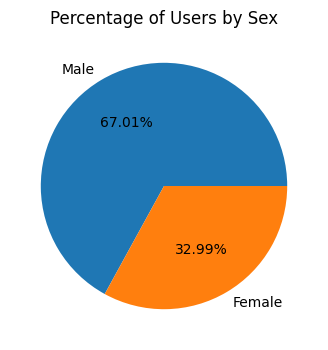

<Figure size 640x480 with 0 Axes>

In [55]:
# Find percentage of users by sex
pct_male = (len(profile_data_m) / len(profile_data_2)) * 100
print(f"Males account for {round(pct_male, 2)}% of users.")
pct_female = (len(profile_data_f) / len(profile_data_2)) * 100
print(f"Females account for {round(pct_female, 2)}% of users.")
# Create pie chart based on sexes
fig = plt.figure(figsize=(4,4))
ax = plt.subplot()
plt.pie([pct_male, pct_female],
        labels=['Male', 'Female'],
        autopct='%1.2f%%')
plt.title('Percentage of Users by Sex')
plt.show()
plt.clf()

### User Ages

The minimum age of users is 18.
The oldest reported age of users is 69.
The average age of users is 33.
The median age of users is 30.
The first quartile of user age is 25.
The third quartile of user age is 39.
The IQR of user age is 14.


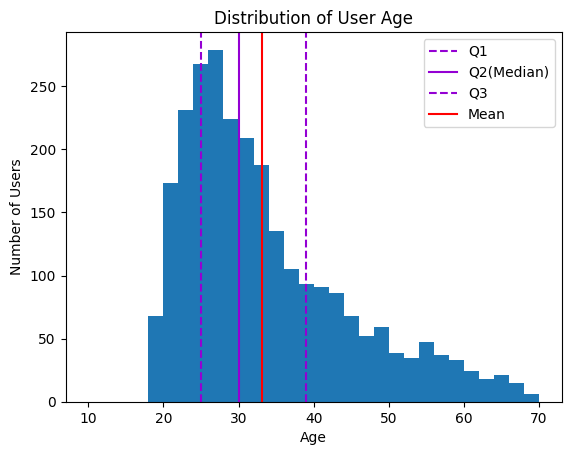

<Figure size 640x480 with 0 Axes>

In [56]:
# Print age statistics
print(f"The minimum age of users is {profile_data_2.age.min()}.")
print(f"The oldest reported age of users is {profile_data_2.age.max()}.")
print(f"The average age of users is {int(profile_data_2.age.mean())}.")
print(f"The median age of users is {int(profile_data_2.age.median())}.")
print(f"The first quartile of user age is {int(np.quantile(profile_data_2.age, 0.25))}.")
print(f"The third quartile of user age is {int(np.quantile(profile_data_2.age, 0.75))}.")
print(f"The IQR of user age is {int(iqr(profile_data_2.age))}.")
# Create histogram to show distribution of user ages
plt.hist(profile_data_2.age, bins=30, range=(10.0,70.0))
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.title('Distribution of User Age')
plt.axvline(np.quantile(profile_data_2.age, 0.25), color='darkviolet',
            linestyle='dashed', label='Q1')
plt.axvline(profile_data_2.age.median(), color='darkviolet',
            linestyle='solid', label='Q2(Median)')
plt.axvline(np.quantile(profile_data_2.age, 0.75), color='darkviolet',
            linestyle='dashed', label='Q3')
plt.axvline(profile_data_2.age.mean(), color='red',
            linestyle='solid', label='Mean')
plt.legend()
plt.show()
plt.clf()

The minimum age of users (male or female) is 18.
The oldest reported age of male users is 69.
The average age of male users is 32.
The median age of male users is 30.
The first quartile of male user age is 25.
The third quartile of male user age is 38.
The IQR of male user age is 13.
The oldest reported age of female users is 68.
The average age of female users is 33.
The median age of female users is 30.
The first quartile of female user age is 24.
The third quartile of female user age is 41.
The IQR of female user age is 17.


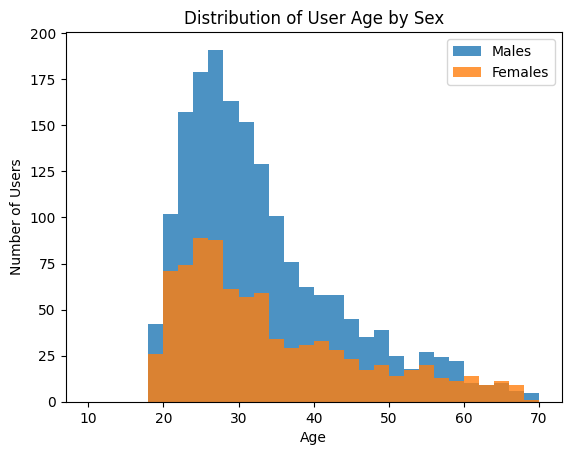

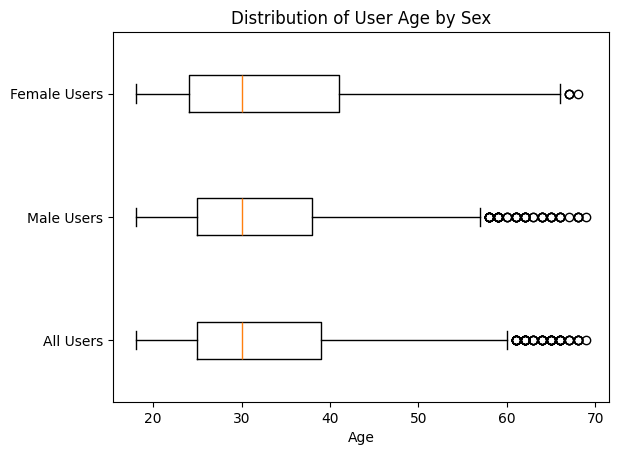

<Figure size 640x480 with 0 Axes>

In [57]:
# Print age statistics by sex
print(f"The minimum age of users (male or female) is {profile_data_2.age.min()}.")
print(f"The oldest reported age of male users is {profile_data_m.age.max()}.")
print(f"The average age of male users is {int(profile_data_m.age.mean())}.")
print(f"The median age of male users is {int(profile_data_m.age.median())}.")
print(f"The first quartile of male user age is {int(np.quantile(profile_data_m.age, 0.25))}.")
print(f"The third quartile of male user age is {int(np.quantile(profile_data_m.age, 0.75))}.")
print(f"The IQR of male user age is {int(iqr(profile_data_m.age))}.")
print(f"The oldest reported age of female users is {profile_data_f.age.max()}.")
print(f"The average age of female users is {int(profile_data_f.age.mean())}.")
print(f"The median age of female users is {int(profile_data_f.age.median())}.")
print(f"The first quartile of female user age is {int(np.quantile(profile_data_f.age, 0.25))}.")
print(f"The third quartile of female user age is {int(np.quantile(profile_data_f.age, 0.75))}.")
print(f"The IQR of female user age is {int(iqr(profile_data_f.age))}.")
# Create histogram to show distribution of user age by sex
plt.hist(profile_data_m.age,
         bins=30, range=(10.0,70.0), alpha=0.8)
plt.hist(profile_data_f.age,
         bins=30, range=(10.0,70.0), alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.legend(['Males', 'Females'])
plt.title('Distribution of User Age by Sex')
plt.show()
plt.clf()
# Create boxplot to show another look at the distribution of user age by sex
plt.boxplot([profile_data_2.age, 
             profile_data_m.age, 
             profile_data_f.age], 
             tick_labels=['All Users', 'Male Users', 'Female Users'],
             vert=False)
plt.xlabel('Age')
plt.title('Distribution of User Age by Sex')
plt.show()
plt.clf()

### User Heights

The shortest reported height of users is 3 ft 11 inches.
The tallest reported height of users is 7 ft 11 inches.
The average height of users is 5 ft 8 inches.
The median height of users is 5 ft 9 inches.
The first quartile of user height is 5 ft 6 inches.
The third quartile of user height is 6 ft 0 inches.
The IQR of user height is 6 inches.


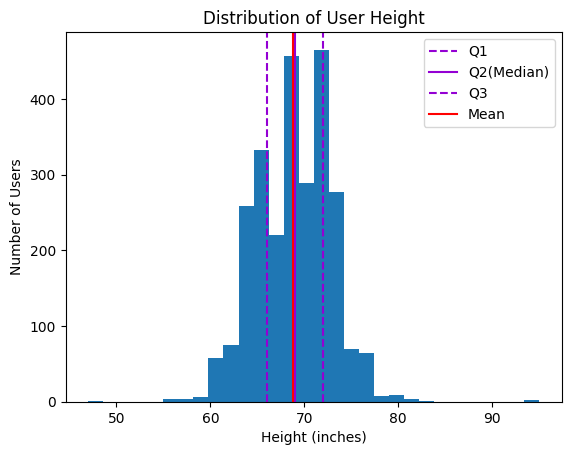

<Figure size 640x480 with 0 Axes>

In [58]:
# Print height statistics
print(f"The shortest reported height of users is {int(profile_data_2.height.min()/12)} ft {int(profile_data_2.height.min()%12)} inches.")
print(f"The tallest reported height of users is {int(profile_data_2.height.max()/12)} ft {int(profile_data_2.height.max()%12)} inches.")
print(f"The average height of users is {int(profile_data_2.height.mean()/12)} ft {int(profile_data_2.height.mean()%12)} inches.")
print(f"The median height of users is {int(profile_data_2.height.median()/12)} ft {int(profile_data_2.height.median()%12)} inches.")
print(f"The first quartile of user height is {int(np.quantile(profile_data_2.height, 0.25)/12)} ft {int(np.quantile(profile_data_2.height, 0.25)%12)} inches.")
print(f"The third quartile of user height is {int(np.quantile(profile_data_2.height, 0.75)/12)} ft {int(np.quantile(profile_data_2.height, 0.75)%12)} inches.")
print(f"The IQR of user height is {int(iqr(profile_data_2.height))} inches.")
# Create histogram to show distribution of user heights
plt.hist(profile_data_2.height, bins=30)
plt.axvline(np.quantile(profile_data_2.height, 0.25), color='darkviolet',
            linestyle='dashed', label='Q1')
plt.axvline(profile_data_2.height.median(), color='darkviolet',
            linestyle='solid', label='Q2(Median)')
plt.axvline(np.quantile(profile_data_2.height, 0.75), color='darkviolet',
            linestyle='dashed', label='Q3')
plt.axvline(profile_data_2.height.mean(), color='red',
            linestyle='solid', label='Mean')
plt.legend()
plt.xlabel('Height (inches)')
plt.ylabel('Number of Users')
plt.title('Distribution of User Height')
plt.show()
plt.clf()

The shortest reported height of male users is 3 ft 11 inches.
The tallest reported height of male users is 7 ft 11 inches.
The average height of male users is 5 ft 10 inches.
The median height of male users is 5 ft 10 inches.
The first quartile of male user height is 5 ft 8 inches.
The third quartile of male user height is 6 ft 0 inches.
The IQR of male user height is 4 inches.
The shortest reported height of female users is 4 ft 7 inches.
The tallest reported height of female users is 7 ft 10 inches.
The average height of female users is 5 ft 5 inches.
The median height of female users is 5 ft 5 inches.
The first quartile of female user height is 5 ft 3 inches.
The third quartile of female user height is 5 ft 7 inches.
The IQR of female user height is 4 inches.


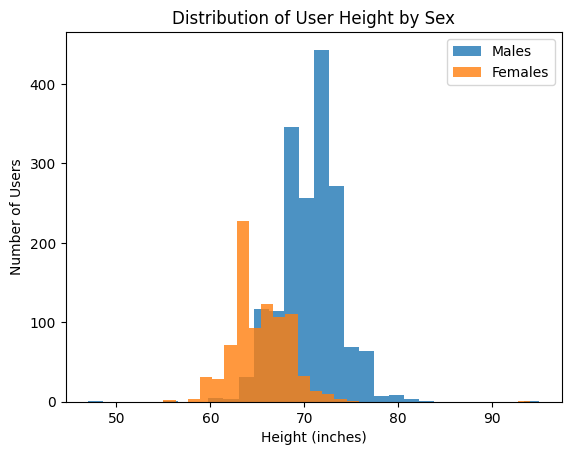

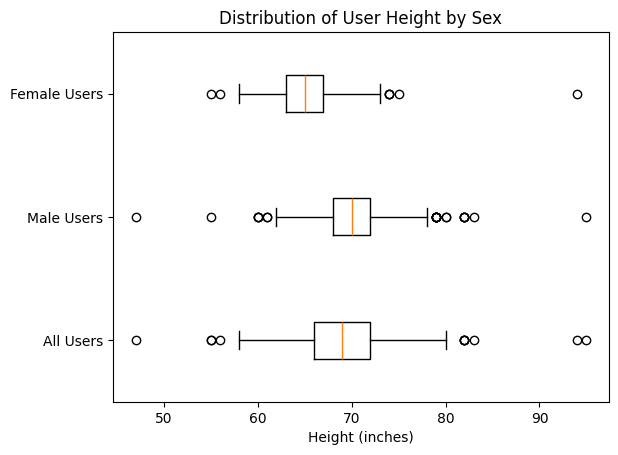

<Figure size 640x480 with 0 Axes>

In [59]:
# Print height statistics by sex
print(f"The shortest reported height of male users is {int(profile_data_m.height.min()/12)} ft {int(profile_data_m.height.min()%12)} inches.")
print(f"The tallest reported height of male users is {int(profile_data_m.height.max()/12)} ft {int(profile_data_m.height.max()%12)} inches.")
print(f"The average height of male users is {int(profile_data_m.height.mean()/12)} ft {int(profile_data_m.height.mean()%12)} inches.")
print(f"The median height of male users is {int(profile_data_m.height.median()/12)} ft {int(profile_data_m.height.median()%12)} inches.")
print(f"The first quartile of male user height is {int(np.quantile(profile_data_m.height, 0.25)/12)} ft {int(np.quantile(profile_data_m.height, 0.25)%12)} inches.")
print(f"The third quartile of male user height is {int(np.quantile(profile_data_m.height, 0.75)/12)} ft {int(np.quantile(profile_data_m.height, 0.75)%12)} inches.")
print(f"The IQR of male user height is {int(iqr(profile_data_m.height))} inches.")
print(f"The shortest reported height of female users is {int(profile_data_f.height.min()/12)} ft {int(profile_data_f.height.min()%12)} inches.")
print(f"The tallest reported height of female users is {int(profile_data_f.height.max()/12)} ft {int(profile_data_f.height.max()%12)} inches.")
print(f"The average height of female users is {int(profile_data_f.height.mean()/12)} ft {int(profile_data_f.height.mean()%12)} inches.")
print(f"The median height of female users is {int(profile_data_f.height.median()/12)} ft {int(profile_data_f.height.median()%12)} inches.")
print(f"The first quartile of female user height is {int(np.quantile(profile_data_f.height, 0.25)/12)} ft {int(np.quantile(profile_data_f.height, 0.25)%12)} inches.")
print(f"The third quartile of female user height is {int(np.quantile(profile_data_f.height, 0.75)/12)} ft {int(np.quantile(profile_data_f.height, 0.75)%12)} inches.")
print(f"The IQR of female user height is {int(iqr(profile_data_f.height))} inches.")
# Create histogram to show distribution of user height by sex
plt.hist(profile_data_m.height,
         bins=30, alpha=0.8)
plt.hist(profile_data_f.height,
         bins=30, alpha=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Number of Users')
plt.title('Distribution of User Height by Sex')
plt.legend(['Males', 'Females'])
plt.show()
plt.clf()
# Create boxplot to show another look at the distribution of user height by sex
plt.boxplot([profile_data_2.height, 
             profile_data_m.height, 
             profile_data_f.height], 
             tick_labels=['All Users', 'Male Users', 'Female Users'],
             vert=False)
plt.xlabel('Height (inches)')
plt.title('Distribution of User Height by Sex')
plt.show()
plt.clf()

### User Income

The lowest reported income of users is $20,000.
The highest reported income of users is $1,000,000.
The average income of users is $95,318.
The median income of users is $50,000.
The first quartile of user income is $20,000.
The third quartile of user income is $80,000.
The IQR of user income is $60,000.


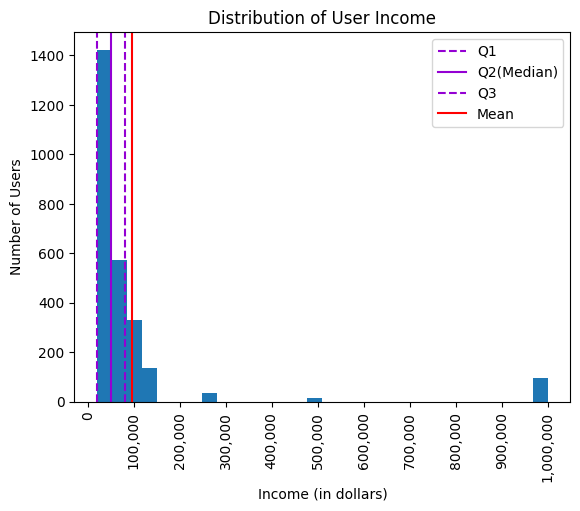

<Figure size 640x480 with 0 Axes>

In [60]:
# Print income statistics
print(f"The lowest reported income of users is ${'{:,}'.format(profile_data_2.income.min())}.")
print(f"The highest reported income of users is ${'{:,}'.format(profile_data_2.income.max())}.")
print(f"The average income of users is ${'{:,}'.format(int(profile_data_2.income.mean()))}.")
print(f"The median income of users is ${'{:,}'.format(int(profile_data_2.income.median()))}.")
print(f"The first quartile of user income is ${'{:,}'.format(int(np.quantile(profile_data_2.income, 0.25)))}.")
print(f"The third quartile of user income is ${'{:,}'.format(int(np.quantile(profile_data_2.income, 0.75)))}.")
print(f"The IQR of user income is ${'{:,}'.format(int(iqr(profile_data_2.income)))}.")
# Create histogram to show distribution of user income
ax = plt.subplot()
plt.hist(profile_data_2.income, bins=30)
plt.axvline(np.quantile(profile_data_2.income, 0.25), color='darkviolet',
            linestyle='dashed', label='Q1')
plt.axvline(profile_data_2.income.median(), color='darkviolet',
            linestyle='solid', label='Q2(Median)')
plt.axvline(np.quantile(profile_data_2.income, 0.75), color='darkviolet',
            linestyle='dashed', label='Q3')
plt.axvline(profile_data_2.income.mean(), color='red',
            linestyle='solid', label='Mean')
plt.legend()
plt.xlabel('Income (in dollars)')
plt.ylabel('Number of Users')
plt.title('Distribution of User Income')
ax.set_xticks(range(0, 1_000_001, 100_000))
ax.set_xticklabels(['{:,}'.format(i) for i in range(0, 1_000_001, 100_000)], rotation=90)
plt.show()
plt.clf()

The lowest reported income of male users is $20,000.
The highest reported income of male users is $1,000,000.
The average income of male users is $105,404.
The median income of male users is $60,000.
The first quartile of male user income is $20,000.
The third quartile of male user income is $100,000.
The IQR of male user income is $80,000.
The lowest reported income of female users is $20,000.
The highest reported income of female users is $1,000,000.
The average income of female users is $74,831.
The median income of female users is $40,000.
The first quartile of female user income is $20,000.
The third quartile of female user income is $70,000.
The IQR of female user income is $50,000.


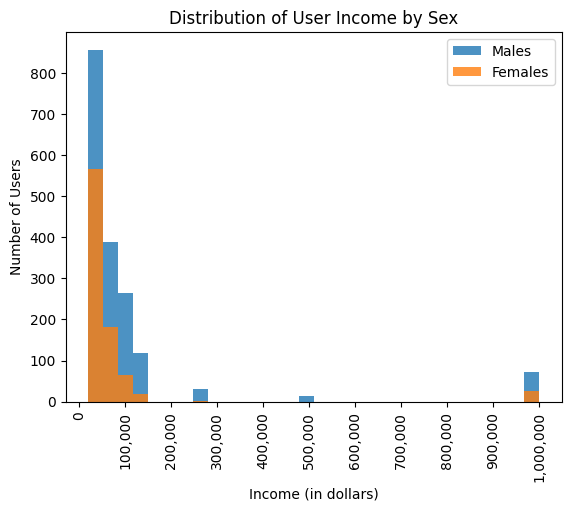

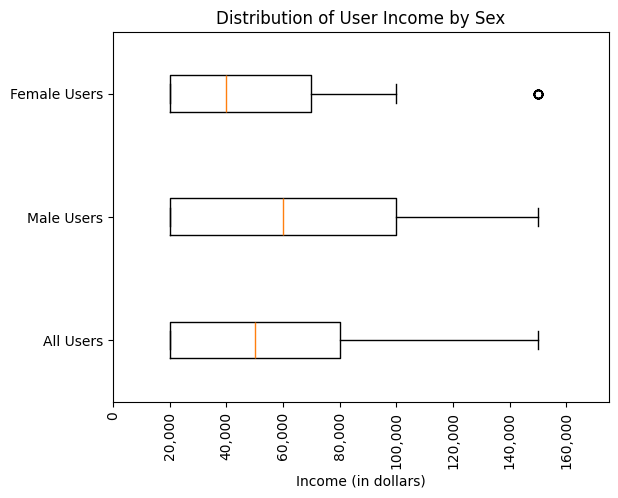

<Figure size 640x480 with 0 Axes>

In [61]:
# Print income statistics by sex
print(f"The lowest reported income of male users is ${'{:,}'.format(profile_data_m.income.min())}.")
print(f"The highest reported income of male users is ${'{:,}'.format(profile_data_m.income.max())}.")
print(f"The average income of male users is ${'{:,}'.format(int(profile_data_m.income.mean()))}.")
print(f"The median income of male users is ${'{:,}'.format(int(profile_data_m.income.median()))}.")
print(f"The first quartile of male user income is ${'{:,}'.format(int(np.quantile(profile_data_m.income, 0.25)))}.")
print(f"The third quartile of male user income is ${'{:,}'.format(int(np.quantile(profile_data_m.income, 0.75)))}.")
print(f"The IQR of male user income is ${'{:,}'.format(int(iqr(profile_data_m.income)))}.")
print(f"The lowest reported income of female users is ${'{:,}'.format(profile_data_f.income.min())}.")
print(f"The highest reported income of female users is ${'{:,}'.format(profile_data_f.income.max())}.")
print(f"The average income of female users is ${'{:,}'.format(int(profile_data_f.income.mean()))}.")
print(f"The median income of female users is ${'{:,}'.format(int(profile_data_f.income.median()))}.")
print(f"The first quartile of female user income is ${'{:,}'.format(int(np.quantile(profile_data_f.income, 0.25)))}.")
print(f"The third quartile of female user income is ${'{:,}'.format(int(np.quantile(profile_data_f.income, 0.75)))}.")
print(f"The IQR of female user income is ${'{:,}'.format(int(iqr(profile_data_f.income)))}.")
# Create histogram to show distribution of user income by sex
ax = plt.subplot()
plt.hist(profile_data_m.income, bins=30, alpha=0.8)
plt.hist(profile_data_f.income, bins=30, alpha=0.8)
plt.xlabel('Income (in dollars)')
plt.ylabel('Number of Users')
plt.title('Distribution of User Income by Sex')
plt.legend(['Males', 'Females'])
ax.set_xticks(range(0, 1_000_001, 100_000))
ax.set_xticklabels(['{:,}'.format(i) for i in range(0, 1_000_001, 100_000)], rotation=90)
plt.show()
plt.clf()
# Create boxplot to show another look at the distribution of user income by sex
ax2 = plt.subplot()
plt.boxplot([profile_data_2.income, 
             profile_data_m.income, 
             profile_data_f.income], 
             tick_labels=['All Users', 'Male Users', 'Female Users'],
             vert=False)
plt.xlabel('Income (in dollars)')
plt.title('Distribution of User Income by Sex')
plt.xlim(0, 175_000)
ax2.set_xticks(range(0, 160_001, 20_000))
ax2.set_xticklabels(['{:,}'.format(i) for i in range(0, 160_001, 20_000)], rotation=90)
plt.show()
plt.clf()

In [62]:
# Create PivotTable to show average income by sex and age group
pt1 = pd.pivot_table(profile_data_2, 'income', 'sex',
                     'age_group',
                      aggfunc=lambda x: int(np.mean(x)),
                      observed=True)
pt1.rename({0:'Female', 1:'Male'}, axis='index', inplace=True)
pt1

age_group,18-19,20-29,30-39,40-49,50-59,60-69
sex,,,,,,
Female,60000,76892,69952,82727,78800,60454
Male,66666,99659,114692,118553,92155,100250


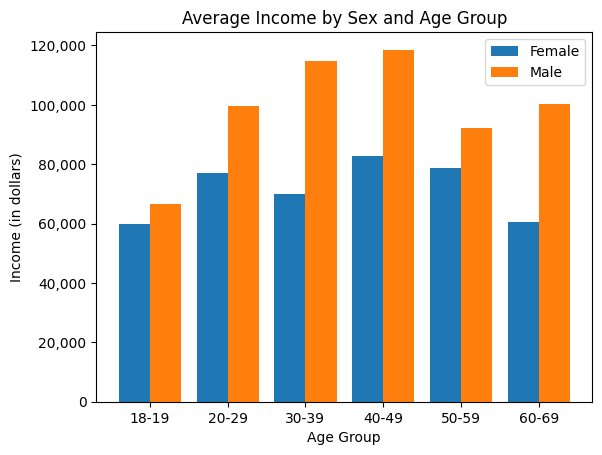

<Figure size 640x480 with 0 Axes>

In [63]:
# Create grouped bar chart from PivotTable
x_axis = np.arange(len(pt1.columns))
bar_width = 0.4
fig, ax = plt.subplots()
plt.bar(x_axis - bar_width/2, 
        pt1.loc['Female'], bar_width, label='Female')
plt.bar(x_axis + bar_width/2, 
        pt1.loc['Male'], bar_width, label='Male')
plt.xticks(x_axis, pt1.columns)
ax.set_yticks(range(0, 120_001, 20_000))
ax.set_yticklabels(['{:,}'.format(i) for i in range(0, 120_001, 20_000)])
plt.xlabel('Age Group')
plt.ylabel('Income (in dollars)')
plt.title('Average Income by Sex and Age Group')
plt.legend()
plt.show()
plt.clf()

### User Ethnicities

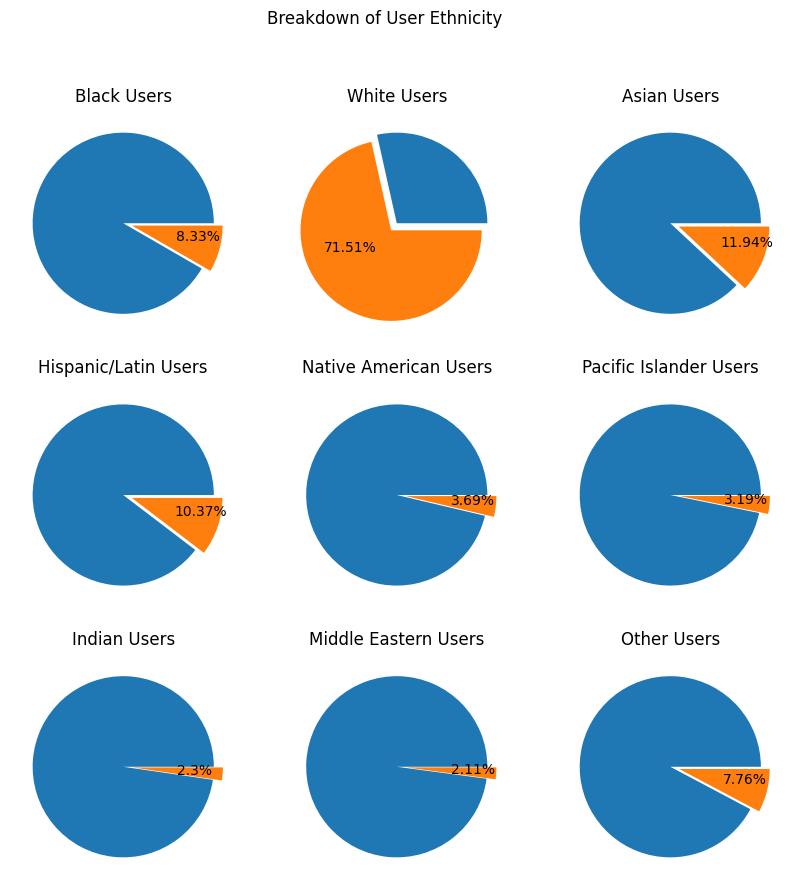

<Figure size 640x480 with 0 Axes>

In [64]:
# Get percentage of users for each ethnicity
pct_black = round((profile_data_2.is_black.sum()/len(profile_data_2))*100, 2)
pct_white = round((profile_data_2.is_white.sum()/len(profile_data_2))*100, 2)
pct_asian = round((profile_data_2.is_asian.sum()/len(profile_data_2))*100, 2)
pct_his_lat = round((profile_data_2.is_hispanic_latin.sum()/len(profile_data_2))*100, 2)
pct_native = round((profile_data_2.is_native_american.sum()/len(profile_data_2))*100, 2)
pct_p_i = round((profile_data_2.is_pacific_islander.sum()/len(profile_data_2))*100, 2)
pct_indian = round((profile_data_2.is_indian.sum()/len(profile_data_2))*100, 2)
pct_m_e = round((profile_data_2.is_middle_eastern.sum()/len(profile_data_2))*100, 2)
pct_other = round((profile_data_2.is_other.sum()/len(profile_data_2))*100, 2)
# Show pie charts for user ethnicities
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(3, 3, 1)
plt.pie(profile_data_2.is_black.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_black}%"],
        labeldistance=0.5)
plt.title('Black Users')

ax2 = plt.subplot(3, 3, 2)
plt.pie(profile_data_2.is_white.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_white}%"],
        labeldistance=0.25)
plt.title('White Users')

ax3 = plt.subplot(3, 3, 3)
plt.pie(profile_data_2.is_asian.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_asian}%"],
        labeldistance=0.5)
plt.title('Asian Users')

ax4 = plt.subplot(3, 3, 4)
plt.pie(profile_data_2.is_hispanic_latin.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_his_lat}%"],
        labeldistance=0.5)
plt.title('Hispanic/Latin Users')

ax5 = plt.subplot(3, 3, 5)
plt.pie(profile_data_2.is_native_american.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_native}%"],
        labeldistance=0.5)
plt.title('Native American Users')

ax6 = plt.subplot(3, 3, 6)
plt.pie(profile_data_2.is_pacific_islander.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_p_i}%"],
        labeldistance=0.5)
plt.title('Pacific Islander Users')

ax7 = plt.subplot(3, 3, 7)
plt.pie(profile_data_2.is_indian.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_indian}%"],
        labeldistance=0.5)
plt.title('Indian Users')

ax8 = plt.subplot(3, 3, 8)
plt.pie(profile_data_2.is_middle_eastern.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_m_e}%"],
        labeldistance=0.5)
plt.title('Middle Eastern Users')

ax9 = plt.subplot(3, 3, 9)
plt.pie(profile_data_2.is_other.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_other}%"],
        labeldistance=0.5)
plt.title('Other Users')
plt.suptitle('Breakdown of User Ethnicity')
plt.show()
plt.clf()

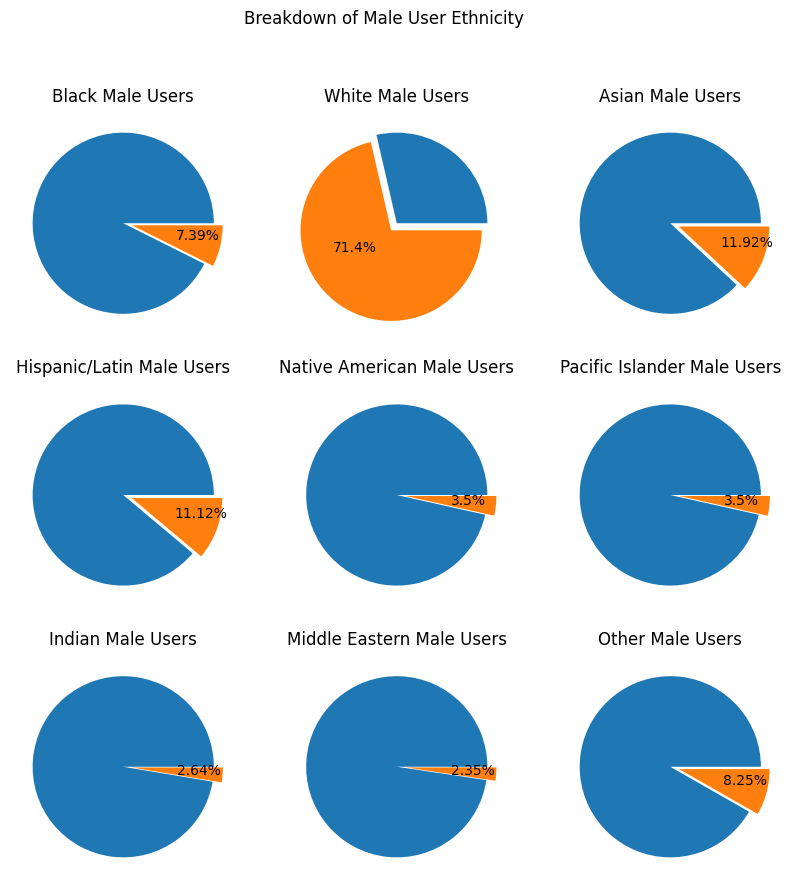

<Figure size 640x480 with 0 Axes>

In [65]:
# Get percentage of male users for each ethnicity
pct_black_m = round((profile_data_m.is_black.sum()/len(profile_data_m))*100, 2)
pct_white_m = round((profile_data_m.is_white.sum()/len(profile_data_m))*100, 2)
pct_asian_m = round((profile_data_m.is_asian.sum()/len(profile_data_m))*100, 2)
pct_his_lat_m = round((profile_data_m.is_hispanic_latin.sum()/len(profile_data_m))*100, 2)
pct_native_m = round((profile_data_m.is_native_american.sum()/len(profile_data_m))*100, 2)
pct_p_i_m = round((profile_data_m.is_pacific_islander.sum()/len(profile_data_m))*100, 2)
pct_indian_m = round((profile_data_m.is_indian.sum()/len(profile_data_m))*100, 2)
pct_m_e_m = round((profile_data_m.is_middle_eastern.sum()/len(profile_data_m))*100, 2)
pct_other_m = round((profile_data_m.is_other.sum()/len(profile_data_m))*100, 2)
# Show pie charts for male user ethnicities
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(3, 3, 1)
plt.pie(profile_data_m.is_black.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_black_m}%"],
        labeldistance=0.5)
plt.title('Black Male Users')

ax2 = plt.subplot(3, 3, 2)
plt.pie(profile_data_m.is_white.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_white_m}%"],
        labeldistance=0.25)
plt.title('White Male Users')

ax3 = plt.subplot(3, 3, 3)
plt.pie(profile_data_m.is_asian.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_asian_m}%"],
        labeldistance=0.5)
plt.title('Asian Male Users')

ax4 = plt.subplot(3, 3, 4)
plt.pie(profile_data_m.is_hispanic_latin.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_his_lat_m}%"],
        labeldistance=0.5)
plt.title('Hispanic/Latin Male Users')

ax5 = plt.subplot(3, 3, 5)
plt.pie(profile_data_m.is_native_american.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_native_m}%"],
        labeldistance=0.5)
plt.title('Native American Male Users')

ax6 = plt.subplot(3, 3, 6)
plt.pie(profile_data_m.is_pacific_islander.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_p_i_m}%"],
        labeldistance=0.5)
plt.title('Pacific Islander Male Users')

ax7 = plt.subplot(3, 3, 7)
plt.pie(profile_data_m.is_indian.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_indian_m}%"],
        labeldistance=0.5)
plt.title('Indian Male Users')

ax8 = plt.subplot(3, 3, 8)
plt.pie(profile_data_m.is_middle_eastern.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_m_e_m}%"],
        labeldistance=0.5)
plt.title('Middle Eastern Male Users')

ax9 = plt.subplot(3, 3, 9)
plt.pie(profile_data_m.is_other.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_other_m}%"],
        labeldistance=0.5)
plt.title('Other Male Users')
plt.suptitle('Breakdown of Male User Ethnicity')
plt.show()
plt.clf()

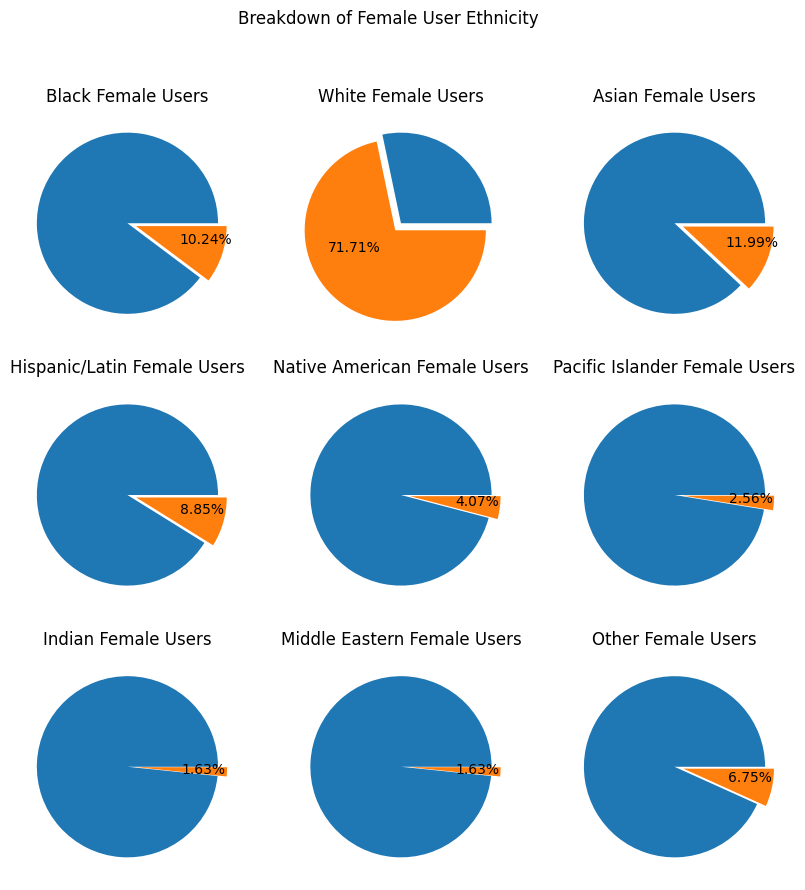

<Figure size 640x480 with 0 Axes>

In [66]:
# Get percentage of female users for each ethnicity
pct_black_f = round((profile_data_f.is_black.sum()/len(profile_data_f))*100, 2)
pct_white_f = round((profile_data_f.is_white.sum()/len(profile_data_f))*100, 2)
pct_asian_f = round((profile_data_f.is_asian.sum()/len(profile_data_f))*100, 2)
pct_his_lat_f = round((profile_data_f.is_hispanic_latin.sum()/len(profile_data_f))*100, 2)
pct_native_f = round((profile_data_f.is_native_american.sum()/len(profile_data_f))*100, 2)
pct_p_i_f = round((profile_data_f.is_pacific_islander.sum()/len(profile_data_f))*100, 2)
pct_indian_f = round((profile_data_f.is_indian.sum()/len(profile_data_f))*100, 2)
pct_m_e_f = round((profile_data_f.is_middle_eastern.sum()/len(profile_data_f))*100, 2)
pct_other_f = round((profile_data_f.is_other.sum()/len(profile_data_f))*100, 2)
# Show pie charts for female user ethnicities
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(3, 3, 1)
plt.pie(profile_data_f.is_black.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_black_f}%"],
        labeldistance=0.5)
plt.title('Black Female Users')

ax2 = plt.subplot(3, 3, 2)
plt.pie(profile_data_f.is_white.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_white_f}%"],
        labeldistance=0.25)
plt.title('White Female Users')

ax3 = plt.subplot(3, 3, 3)
plt.pie(profile_data_f.is_asian.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_asian_f}%"],
        labeldistance=0.5)
plt.title('Asian Female Users')

ax4 = plt.subplot(3, 3, 4)
plt.pie(profile_data_f.is_hispanic_latin.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_his_lat_f}%"],
        labeldistance=0.5)
plt.title('Hispanic/Latin Female Users')

ax5 = plt.subplot(3, 3, 5)
plt.pie(profile_data_f.is_native_american.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_native_f}%"],
        labeldistance=0.5)
plt.title('Native American Female Users')

ax6 = plt.subplot(3, 3, 6)
plt.pie(profile_data_f.is_pacific_islander.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_p_i_f}%"],
        labeldistance=0.5)
plt.title('Pacific Islander Female Users')

ax7 = plt.subplot(3, 3, 7)
plt.pie(profile_data_f.is_indian.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_indian_f}%"],
        labeldistance=0.5)
plt.title('Indian Female Users')

ax8 = plt.subplot(3, 3, 8)
plt.pie(profile_data_f.is_middle_eastern.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_m_e_f}%"],
        labeldistance=0.5)
plt.title('Middle Eastern Female Users')

ax9 = plt.subplot(3, 3, 9)
plt.pie(profile_data_f.is_other.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_other_f}%"],
        labeldistance=0.5)
plt.title('Other Female Users')
plt.suptitle('Breakdown of Female User Ethnicity')
plt.show()
plt.clf()

### User Religiosity

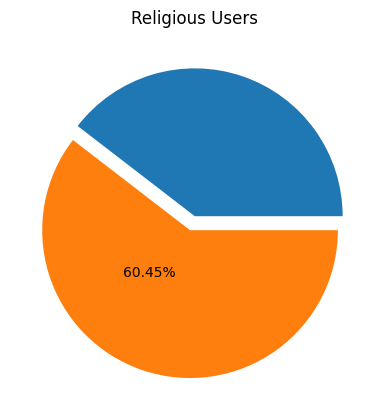

<Figure size 640x480 with 0 Axes>

In [67]:
# Get percentage of users that subscribe to religion
pct_religious = round((profile_data_2.is_religious.sum()/len(profile_data_2))*100, 2)
# Create pie chart that shows percentage of religious users
plt.pie(profile_data_2.is_religious.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_religious}%"],
        labeldistance=0.3)
plt.title('Religious Users')
plt.show()
plt.clf()

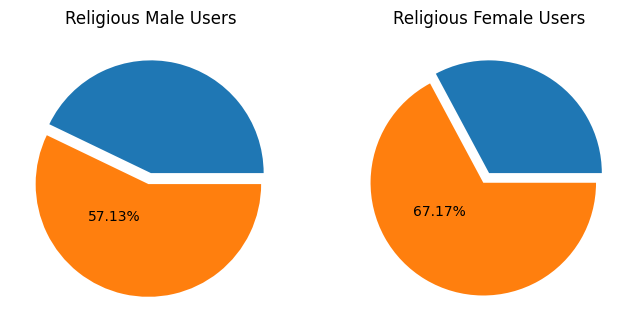

<Figure size 640x480 with 0 Axes>

In [68]:
# Get percentage of users by sex that subscribe to religion
pct_religious_m = round((profile_data_m.is_religious.sum()/len(profile_data_m))*100, 2)
pct_religious_f = round((profile_data_f.is_religious.sum()/len(profile_data_f))*100, 2)
# Create pie charts that shows percentage of religious users by sex
fig = plt.figure(figsize=(8, 4))
ax = plt.subplot(1, 2, 1)
plt.pie(profile_data_m.is_religious.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_religious_m}%"],
        labeldistance=0.3)
plt.title('Religious Male Users')

ax2 = plt.subplot(1, 2, 2)
plt.pie(profile_data_f.is_religious.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_religious_f}%"],
        labeldistance=0.3)
plt.title('Religious Female Users')
plt.show()
plt.clf()

### User Drinking, Smoking, and Drug Habits

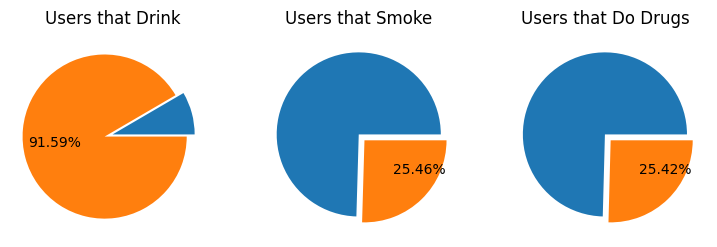

<Figure size 640x480 with 0 Axes>

In [69]:
# Get percentage of users that drink, smoke and use drugs
pct_drink = round((profile_data_2.is_drinker.sum()/len(profile_data_2))*100, 2)
pct_smoke = round((profile_data_2.is_smoker.sum()/len(profile_data_2))*100, 2)
pct_drugs = round((profile_data_2.uses_drugs.sum()/len(profile_data_2))*100, 2)
# Show pie charts for user habits
fig = plt.figure(figsize=(9,3))
ax = plt.subplot(1, 3, 1)
plt.pie(profile_data_2.is_drinker.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_drink}%"],
        labeldistance=0.3)
plt.title('Users that Drink')

ax2 = plt.subplot(1, 3, 2)
plt.pie(profile_data_2.is_smoker.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_smoke}%"],
        labeldistance=0.5)
plt.title('Users that Smoke')

ax3 = plt.subplot(1, 3, 3)
plt.pie(profile_data_2.uses_drugs.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_drugs}%"],
        labeldistance=0.5)
plt.title('Users that Do Drugs')
plt.show()
plt.clf()

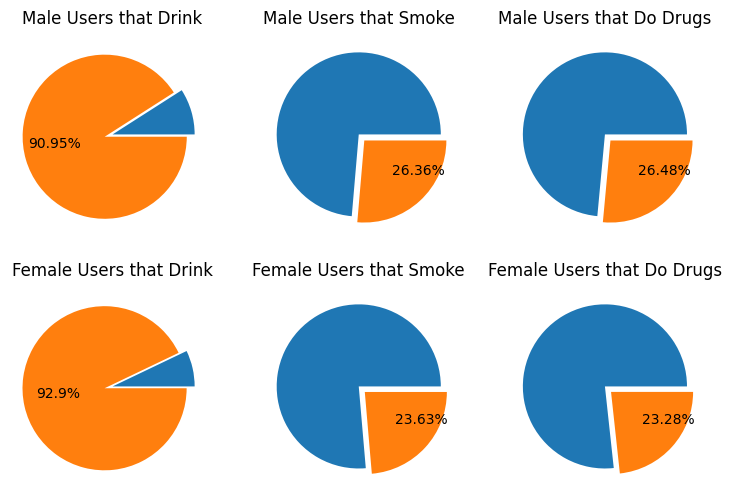

<Figure size 640x480 with 0 Axes>

In [70]:
# Get percentage of users by sex that drink, smoke and use drugs
pct_drink_m = round((profile_data_m.is_drinker.sum()/len(profile_data_m))*100, 2)
pct_drink_f = round((profile_data_f.is_drinker.sum()/len(profile_data_f))*100, 2)
pct_smoke_m = round((profile_data_m.is_smoker.sum()/len(profile_data_m))*100, 2)
pct_smoke_f = round((profile_data_f.is_smoker.sum()/len(profile_data_f))*100, 2)
pct_drugs_m = round((profile_data_m.uses_drugs.sum()/len(profile_data_m))*100, 2)
pct_drugs_f = round((profile_data_f.uses_drugs.sum()/len(profile_data_f))*100, 2)
# Show pie charts for user habits by sex
fig = plt.figure(figsize=(9,6))
ax = plt.subplot(2, 3, 1)
plt.pie(profile_data_m.is_drinker.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_drink_m}%"],
        labeldistance=0.3)
plt.title('Male Users that Drink')

ax2 = plt.subplot(2, 3, 2)
plt.pie(profile_data_m.is_smoker.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_smoke_m}%"],
        labeldistance=0.5)
plt.title('Male Users that Smoke')

ax3 = plt.subplot(2, 3, 3)
plt.pie(profile_data_m.uses_drugs.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_drugs_m}%"],
        labeldistance=0.5)
plt.title('Male Users that Do Drugs')

ax4 = plt.subplot(2, 3, 4)
plt.pie(profile_data_f.is_drinker.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_drink_f}%"],
        labeldistance=0.3)
plt.title('Female Users that Drink')

ax5 = plt.subplot(2, 3, 5)
plt.pie(profile_data_f.is_smoker.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_smoke_f}%"],
        labeldistance=0.5)
plt.title('Female Users that Smoke')

ax6 = plt.subplot(2, 3, 6)
plt.pie(profile_data_f.uses_drugs.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_drugs_f}%"],
        labeldistance=0.5)
plt.title('Female Users that Do Drugs')
plt.show()
plt.clf()

### User Diet and Fitness

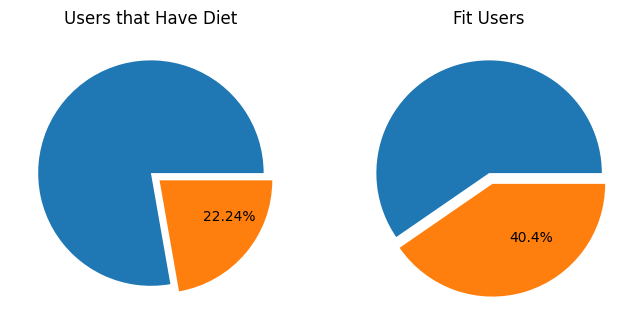

<Figure size 640x480 with 0 Axes>

In [71]:
# Get percentage of users that diet and have above-average levels of fitness
pct_diet = round((profile_data_2.adheres_to_diet.sum()/len(profile_data_2))*100, 2)
pct_fit = round((profile_data_2.is_fit.sum()/len(profile_data_2))*100, 2)
# Show pie charts for diet and fitness
fig = plt.figure(figsize=(8,4))
ax = plt.subplot(1, 2, 1)
plt.pie(profile_data_2.adheres_to_diet.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_diet}%"],
        labeldistance=0.5)
plt.title('Users that Have Diet')

ax2 = plt.subplot(1, 2, 2)
plt.pie(profile_data_2.is_fit.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_fit}%"],
        labeldistance=0.5)
plt.title('Fit Users')
plt.show()
plt.clf()

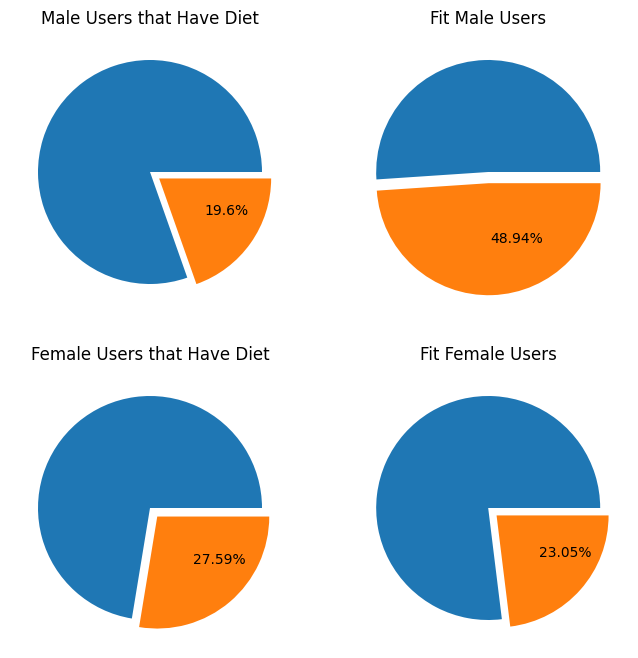

<Figure size 640x480 with 0 Axes>

In [72]:
# Get percentage of users by sex that diet and have above-average levels of fitness
pct_diet_m = round((profile_data_m.adheres_to_diet.sum()/len(profile_data_m))*100, 2)
pct_diet_f = round((profile_data_f.adheres_to_diet.sum()/len(profile_data_f))*100, 2)
pct_fit_m = round((profile_data_m.is_fit.sum()/len(profile_data_m))*100, 2)
pct_fit_f = round((profile_data_f.is_fit.sum()/len(profile_data_f))*100, 2)
# Show pie charts for diet and fitness by sex
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(2, 2, 1)
plt.pie(profile_data_m.adheres_to_diet.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_diet_m}%"],
        labeldistance=0.5)
plt.title('Male Users that Have Diet')

ax2 = plt.subplot(2, 2, 2)
plt.pie(profile_data_m.is_fit.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_fit_m}%"],
        labeldistance=0.5)
plt.title('Fit Male Users')

ax3 = plt.subplot(2, 2, 3)
plt.pie(profile_data_f.adheres_to_diet.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_diet_f}%"],
        labeldistance=0.5)
plt.title('Female Users that Have Diet')

ax4 = plt.subplot(2, 2, 4)
plt.pie(profile_data_f.is_fit.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_fit_f}%"],
        labeldistance=0.5)
plt.title('Fit Female Users')
plt.show()
plt.clf()

### User Education and Employment Status

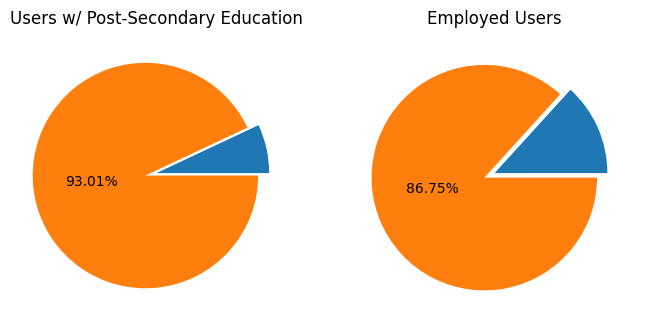

<Figure size 640x480 with 0 Axes>

In [73]:
# Get percentage of users that have education beyond high school and have a job
pct_post_sec_edu = round((profile_data_2.post_secondary_edu.sum()/len(profile_data_2))*100, 2)
pct_employed = round((profile_data_2.has_job.sum()/len(profile_data_2))*100, 2)
# Show pie charts for education and employment
fig = plt.figure(figsize=(8,4))
ax = plt.subplot(1, 2, 1)
plt.pie(profile_data_2.post_secondary_edu.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_post_sec_edu}%"],
        labeldistance=0.25)
plt.title('Users w/ Post-Secondary Education')

ax2 = plt.subplot(1, 2, 2)
plt.pie(profile_data_2.has_job.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_employed}%"],
        labeldistance=0.25)
plt.title('Employed Users')
plt.show()
plt.clf()

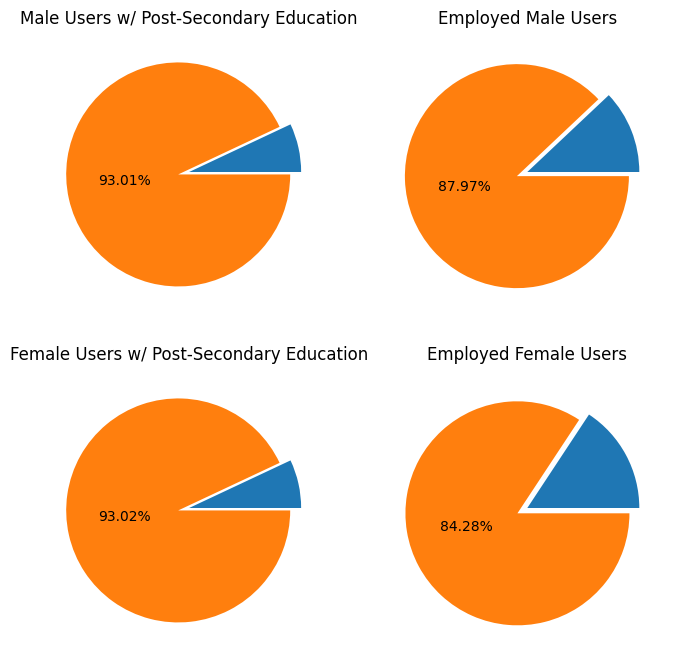

<Figure size 640x480 with 0 Axes>

In [74]:
# Get percentage of users by sex that have education beyond high school and have a job
pct_post_sec_edu_m = round((profile_data_m.post_secondary_edu.sum()/len(profile_data_m))*100, 2)
pct_post_sec_edu_f = round((profile_data_f.post_secondary_edu.sum()/len(profile_data_f))*100, 2)
pct_employed_m = round((profile_data_m.has_job.sum()/len(profile_data_m))*100, 2)
pct_employed_f = round((profile_data_f.has_job.sum()/len(profile_data_f))*100, 2)
# Show pie charts for education and employment by sex
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(2, 2, 1)
plt.pie(profile_data_m.post_secondary_edu.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_post_sec_edu_m}%"],
        labeldistance=0.25)
plt.title('Male Users w/ Post-Secondary Education')

ax2 = plt.subplot(2, 2, 2)
plt.pie(profile_data_m.has_job.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_employed_m}%"],
        labeldistance=0.25)
plt.title('Employed Male Users')

ax3 = plt.subplot(2, 2, 3)
plt.pie(profile_data_f.post_secondary_edu.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_post_sec_edu_f}%"],
        labeldistance=0.25)
plt.title('Female Users w/ Post-Secondary Education')

ax4 = plt.subplot(2, 2, 4)
plt.pie(profile_data_f.has_job.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_employed_f}%"],
        labeldistance=0.25)
plt.title('Employed Female Users')
plt.show()
plt.clf()

### User Parental Status

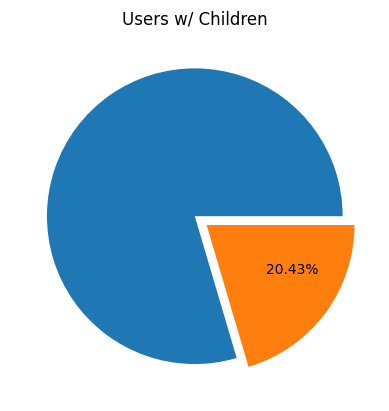

<Figure size 640x480 with 0 Axes>

In [75]:
# Get percentage of users with at least one kid
pct_w_kid = round((profile_data_2.has_kid.sum()/len(profile_data_2))*100, 2)
# Create pie chart that shows percentage of users with children
plt.pie(profile_data_2.has_kid.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_w_kid}%"],
        labeldistance=0.5)
plt.title('Users w/ Children')
plt.show()
plt.clf()

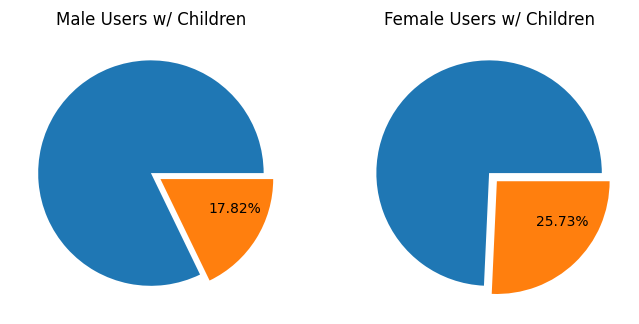

<Figure size 640x480 with 0 Axes>

In [76]:
# Get percentage of users by sex with at least one kid
pct_w_kid_m = round((profile_data_m.has_kid.sum()/len(profile_data_m))*100, 2)
pct_w_kid_f = round((profile_data_f.has_kid.sum()/len(profile_data_f))*100, 2)
# Create pie chart that shows percentage of users by sex with children
fig = plt.figure(figsize=(8,4))
ax = plt.subplot(1, 2, 1)
plt.pie(profile_data_m.has_kid.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_w_kid_m}%"],
        labeldistance=0.5)
plt.title('Male Users w/ Children')

ax2 = plt.subplot(1, 2, 2)
plt.pie(profile_data_f.has_kid.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_w_kid_f}%"],
        labeldistance=0.5)
plt.title('Female Users w/ Children')
plt.show()
plt.clf()

### User Sexual Orientation

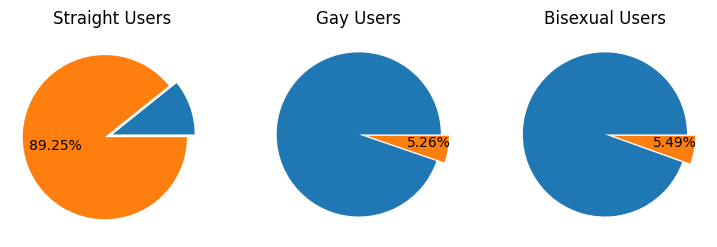

<Figure size 640x480 with 0 Axes>

In [77]:
# Get percentage of users that gay, straight, and bi
pct_straight = round((profile_data_2.is_straight.sum()/len(profile_data_2))*100, 2)
pct_gay = round((profile_data_2.is_gay.sum()/len(profile_data_2))*100, 2)
pct_bisexual = round((profile_data_2.is_bisexual.sum()/len(profile_data_2))*100, 2)
# Show pie charts for user sexual orientation
fig = plt.figure(figsize=(9,3))
ax = plt.subplot(1, 3, 1)
plt.pie(profile_data_2.is_straight.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_straight}%"],
        labeldistance=0.3)
plt.title('Straight Users')

ax2 = plt.subplot(1, 3, 2)
plt.pie(profile_data_2.is_gay.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_gay}%"],
        labeldistance=0.5)
plt.title('Gay Users')

ax3 = plt.subplot(1, 3, 3)
plt.pie(profile_data_2.is_bisexual.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_bisexual}%"],
        labeldistance=0.5)
plt.title('Bisexual Users')
plt.show()
plt.clf()

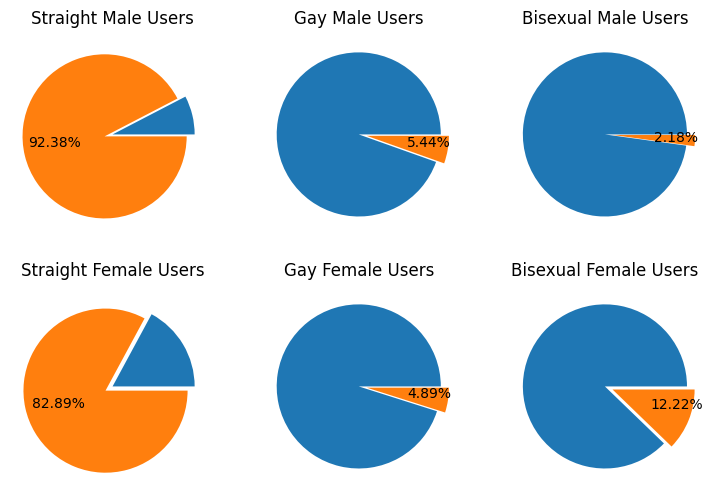

<Figure size 640x480 with 0 Axes>

In [78]:
# Get percentage of users by sex that are gay, straight, and bi
pct_straight_m = round((profile_data_m.is_straight.sum()/len(profile_data_m))*100, 2)
pct_straight_f = round((profile_data_f.is_straight.sum()/len(profile_data_f))*100, 2)
pct_gay_m = round((profile_data_m.is_gay.sum()/len(profile_data_m))*100, 2)
pct_gay_f = round((profile_data_f.is_gay.sum()/len(profile_data_f))*100, 2)
pct_bisexual_m = round((profile_data_m.is_bisexual.sum()/len(profile_data_m))*100, 2)
pct_bisexual_f = round((profile_data_f.is_bisexual.sum()/len(profile_data_f))*100, 2)
# Show pie charts for user sexual orientation by sex
fig = plt.figure(figsize=(9,6))
ax = plt.subplot(2, 3, 1)
plt.pie(profile_data_m.is_straight.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_straight_m}%"],
        labeldistance=0.3)
plt.title('Straight Male Users')

ax2 = plt.subplot(2, 3, 2)
plt.pie(profile_data_m.is_gay.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_gay_m}%"],
        labeldistance=0.5)
plt.title('Gay Male Users')

ax3 = plt.subplot(2, 3, 3)
plt.pie(profile_data_m.is_bisexual.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_bisexual_m}%"],
        labeldistance=0.5)
plt.title('Bisexual Male Users')

ax4 = plt.subplot(2, 3, 4)
plt.pie(profile_data_f.is_straight.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_straight_f}%"],
        labeldistance=0.3)
plt.title('Straight Female Users')

ax5 = plt.subplot(2, 3, 5)
plt.pie(profile_data_f.is_gay.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_gay_f}%"],
        labeldistance=0.5)
plt.title('Gay Female Users')

ax6 = plt.subplot(2, 3, 6)
plt.pie(profile_data_f.is_bisexual.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_bisexual_f}%"],
        labeldistance=0.5)
plt.title('Bisexual Female Users')
plt.show()
plt.clf()

### User Relationship Status

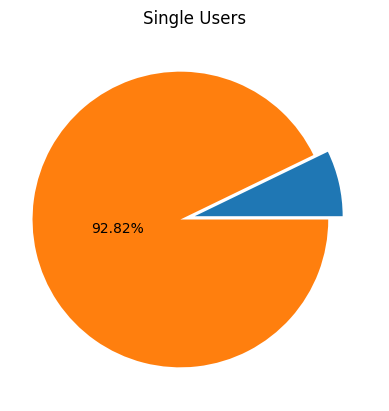

<Figure size 640x480 with 0 Axes>

In [79]:
# Get percentage of single users
pct_single = round((profile_data_2.is_single.sum()/len(profile_data_2))*100, 2)
# Create pie chart that shows percentage of single users
plt.pie(profile_data_2.is_single.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_single}%"],
        labeldistance=0.25)
plt.title('Single Users')
plt.show()
plt.clf()

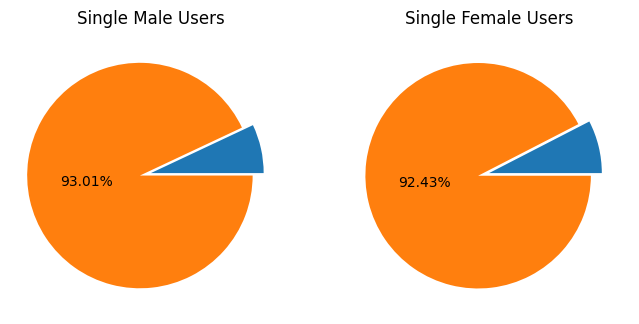

<Figure size 640x480 with 0 Axes>

In [80]:
# Get percentage of single users by sex
pct_single_m = round((profile_data_m.is_single.sum()/len(profile_data_m))*100, 2)
pct_single_f = round((profile_data_f.is_single.sum()/len(profile_data_f))*100, 2)
# Create pie chart that shows percentage of single users by sex
fig = plt.figure(figsize=(8,4))
ax = plt.subplot(1, 2, 1)
plt.pie(profile_data_m.is_single.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_single_m}%"],
        labeldistance=0.25)
plt.title('Single Male Users')

ax2 = plt.subplot(1, 2, 2)
plt.pie(profile_data_f.is_single.value_counts().sort_index(),
        explode=[0, 0.1], labels=['', f"{pct_single_f}%"],
        labeldistance=0.25)
plt.title('Single Female Users')
plt.show()
plt.clf()

### User Zodiac Signs

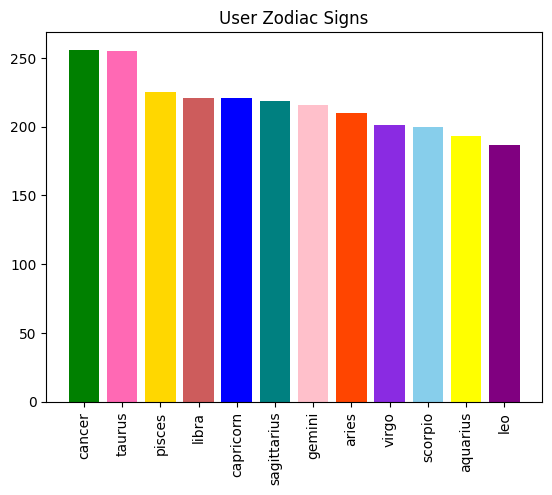

<Figure size 640x480 with 0 Axes>

In [81]:
# Method used for assigning each zodiac sign 
# a color to be used in bar charts
def get_color(label):
    if label == 'aries':
        return 'orangered'
    elif label == 'aquarius':
        return 'yellow'
    elif label == 'cancer':
        return 'green'
    elif label == 'capricorn':
        return 'blue'
    elif label == 'gemini':
        return 'pink'
    elif label == 'leo':
        return 'purple'
    elif label == 'libra':
        return 'indianred'
    elif label == 'pisces':
        return 'gold'
    elif label == 'sagittarius':
        return 'teal'
    elif label == 'scorpio':
        return 'skyblue'
    elif label == 'taurus':
        return 'hotpink'
    elif label == 'virgo':
        return 'blueviolet'
bar_colors = [get_color(label) for label in profile_data_2.sign.unique()]
# Create bar chart to show distribution of user signs
plt.bar(profile_data_2.sign.unique(),
        profile_data_2.sign.value_counts(), color=bar_colors)
plt.xticks(rotation=90)
plt.title('User Zodiac Signs')
plt.show()
plt.clf()

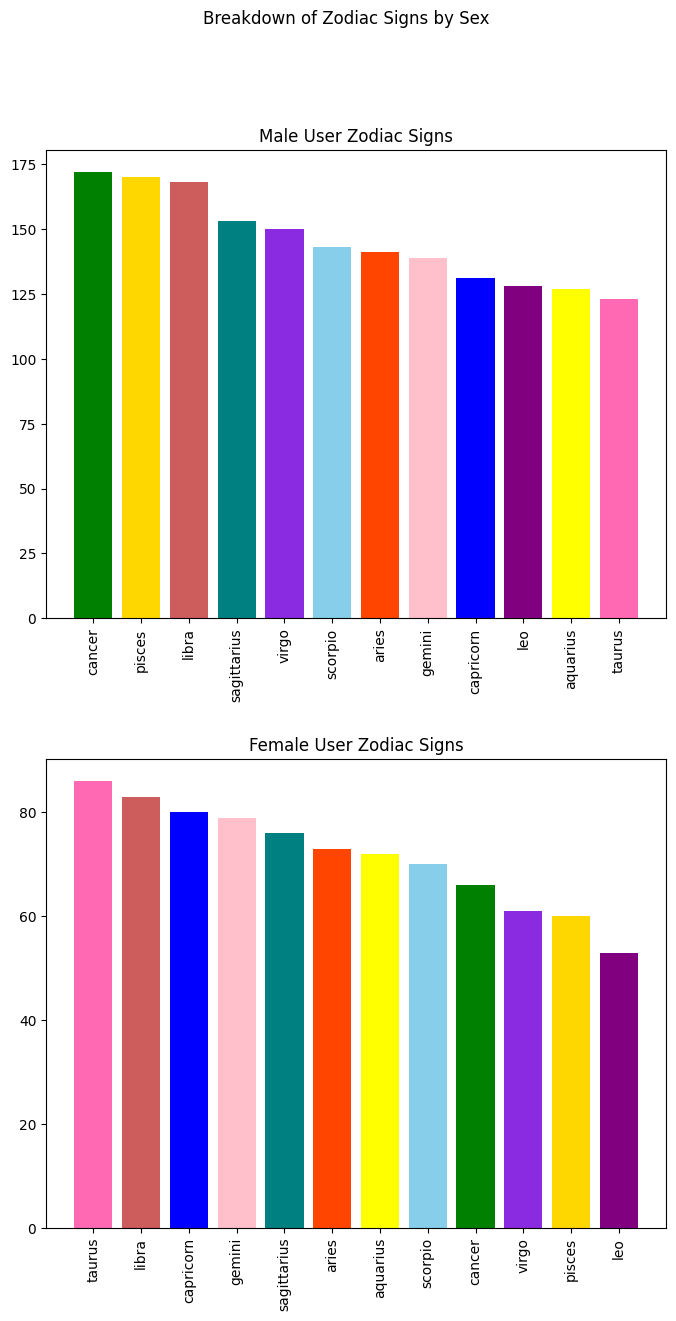

<Figure size 640x480 with 0 Axes>

In [82]:
# Create bar chart to show distribution of user signs by sex
fig = plt.figure(figsize=(8, 14))
ax = plt.subplot(2, 1, 1)
bar_colors = [get_color(label) for label in profile_data_m.sign.unique()]
plt.bar(profile_data_m.sign.unique(),
        profile_data_m.sign.value_counts(),
        label=profile_data_2.sign.unique(), color=bar_colors)
plt.xticks(rotation=90)
plt.title('Male User Zodiac Signs')

ax2 = plt.subplot(2, 1, 2)
bar_colors = [get_color(label) for label in profile_data_f.sign.unique()]
plt.bar(profile_data_f.sign.unique(),
        profile_data_f.sign.value_counts(), color=bar_colors)
plt.xticks(rotation=90)
plt.title('Female User Zodiac Signs')
fig.subplots_adjust(hspace=0.3)
fig.suptitle('Breakdown of Zodiac Signs by Sex')
plt.show()
plt.clf()

## Applying Machine-Learning to Data

### Singular Models

#### K-Nearest Neighbors Classifier

In [ ]:
# Show column names for ease of choosing 
# independent (predictor) and dependent (target) variables
profile_data_2.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status', 'age_group',
       'is_black', 'is_white', 'is_asian', 'is_hispanic_latin',
       'is_native_american', 'is_pacific_islander', 'is_indian',
       'is_middle_eastern', 'is_other', 'is_religious', 'is_drinker',
       'is_smoker', 'uses_drugs', 'post_secondary_edu', 'adheres_to_diet',
       'is_fit', 'has_job', 'has_kid', 'is_straight', 'is_gay', 'is_bisexual',
       'is_single', 'age_centered', 'height_centered', 'income_centered'],
      dtype='object')

In [ ]:
# Select predictor and target variables
X = profile_data_2[['age_centered', 'height_centered',
       'income_centered', 'is_religious', 'is_drinker',
       'is_smoker', 'uses_drugs', 'post_secondary_edu',
       'adheres_to_diet', 'is_fit', 'has_job',
       'has_kid', 'is_single', 'is_straight']]
y = profile_data_2['sex']

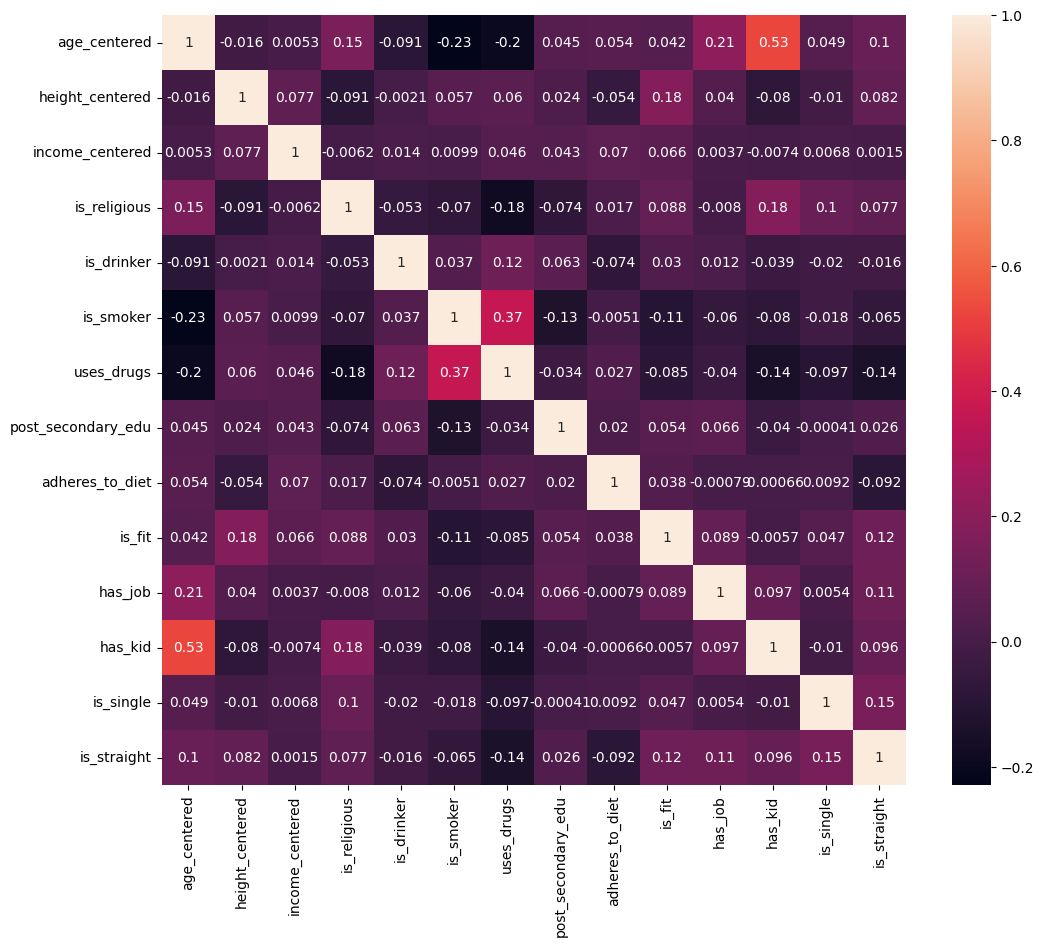

<Figure size 640x480 with 0 Axes>

In [85]:
# Create a heatmap to check for multicollinearity between features
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), annot=True)
plt.show()
plt.clf()

In [86]:
# Split data into training and test data
x_train, x_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, test_size=0.2, random_state=3)

In [87]:
# Instantiate and train K-Nearest Neighbors Model
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [88]:
# Score train and test data
print(knn_classifier.score(x_train, y_train))
print(knn_classifier.score(x_test, y_test))

0.8737397983677389
0.8483685220729367


##### Note

- &emsp;Accuracy measures how many classifications an algorithm got correct out of every classification that it made.

$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

- &emsp;Recall is the ratio of correct positive predictions classifications made by the model to all actual positives.

$Recall = \frac{TP}{TP + FN}$

- &emsp;Precision is the ratio of correct positive classifications to all positive classifications made by the model.

$Precision = \frac{TP}{TP + FP}$

- &emsp;F1-score is a combination of precision and recall, and it will be low if either precision or recall is low.

$F1\text-score = \frac{2 \times Precision \times Recall }{Precision + Recall}$

&emsp;$TP = True Positives$, $TN = True Negatives$,

&emsp;$FP = False Positives$, $FN = False Negatives$

In [89]:
# Make predictions using the model
y_pred_knn = knn_classifier.predict(x_test)
# Calculate and print evaluation metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
print(f"Accuracy Score: {accuracy_knn}")
print(f"Precision Score: {precision_knn}")
print(f"Recall Score: {recall_knn}")
print(f"F1 Score: {f1_knn}")

Accuracy Score: 0.8483685220729367
Precision Score: 0.848106252196598
Recall Score: 0.8483685220729367
F1 Score: 0.8482339291370197


#### Logistic Regression Classifier

In [90]:
# Instantiate and train Logistic Regression Model
logrm = LogisticRegression()
logrm.fit(x_train, y_train)

LogisticRegression()

In [91]:
# Score train and test data
print(logrm.score(x_train, y_train))
print(logrm.score(x_test, y_test))

0.8506961113778204
0.8598848368522073


In [92]:
# Make predictions using the model
y_pred_log = logrm.predict(x_test)
# Calculate and print evaluation metrics
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log, average='weighted')
recall_log = recall_score(y_test, y_pred_log, average='weighted')
f1_log = f1_score(y_test, y_pred_log, average='weighted')
print(f"Accuracy Score: {accuracy_log}")
print(f"Precision Score: {precision_log}")
print(f"Recall Score: {recall_log}")
print(f"F1 Score: {f1_log}")

Accuracy Score: 0.8598848368522073
Precision Score: 0.860674135499172
Recall Score: 0.8598848368522073
F1 Score: 0.860248078878852


#### Decision Tree Classifier

In [93]:
# Instantiate and train Decision Tree Model
tree_classifier = DecisionTreeClassifier(max_depth=5) # Use max_depth of 5 to prevent overfitting
tree_classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [94]:
# Score train and test data
print(tree_classifier.score(x_train, y_train))
print(tree_classifier.score(x_test, y_test))

0.8588574171867499
0.8656429942418427


In [95]:
# Make predictions using the model
y_pred_tree = tree_classifier.predict(x_test)
# Calculate and print evaluation metrics
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree, average='weighted')
recall_tree = recall_score(y_test, y_pred_tree, average='weighted')
f1_tree = f1_score(y_test, y_pred_tree, average='weighted')
print(f"Accuracy Score: {accuracy_tree}")
print(f"Precision Score: {precision_tree}")
print(f"Recall Score: {recall_tree}")
print(f"F1 Score: {f1_tree}")

Accuracy Score: 0.8656429942418427
Precision Score: 0.8678842581598896
Recall Score: 0.8656429942418427
F1 Score: 0.8665409486622025


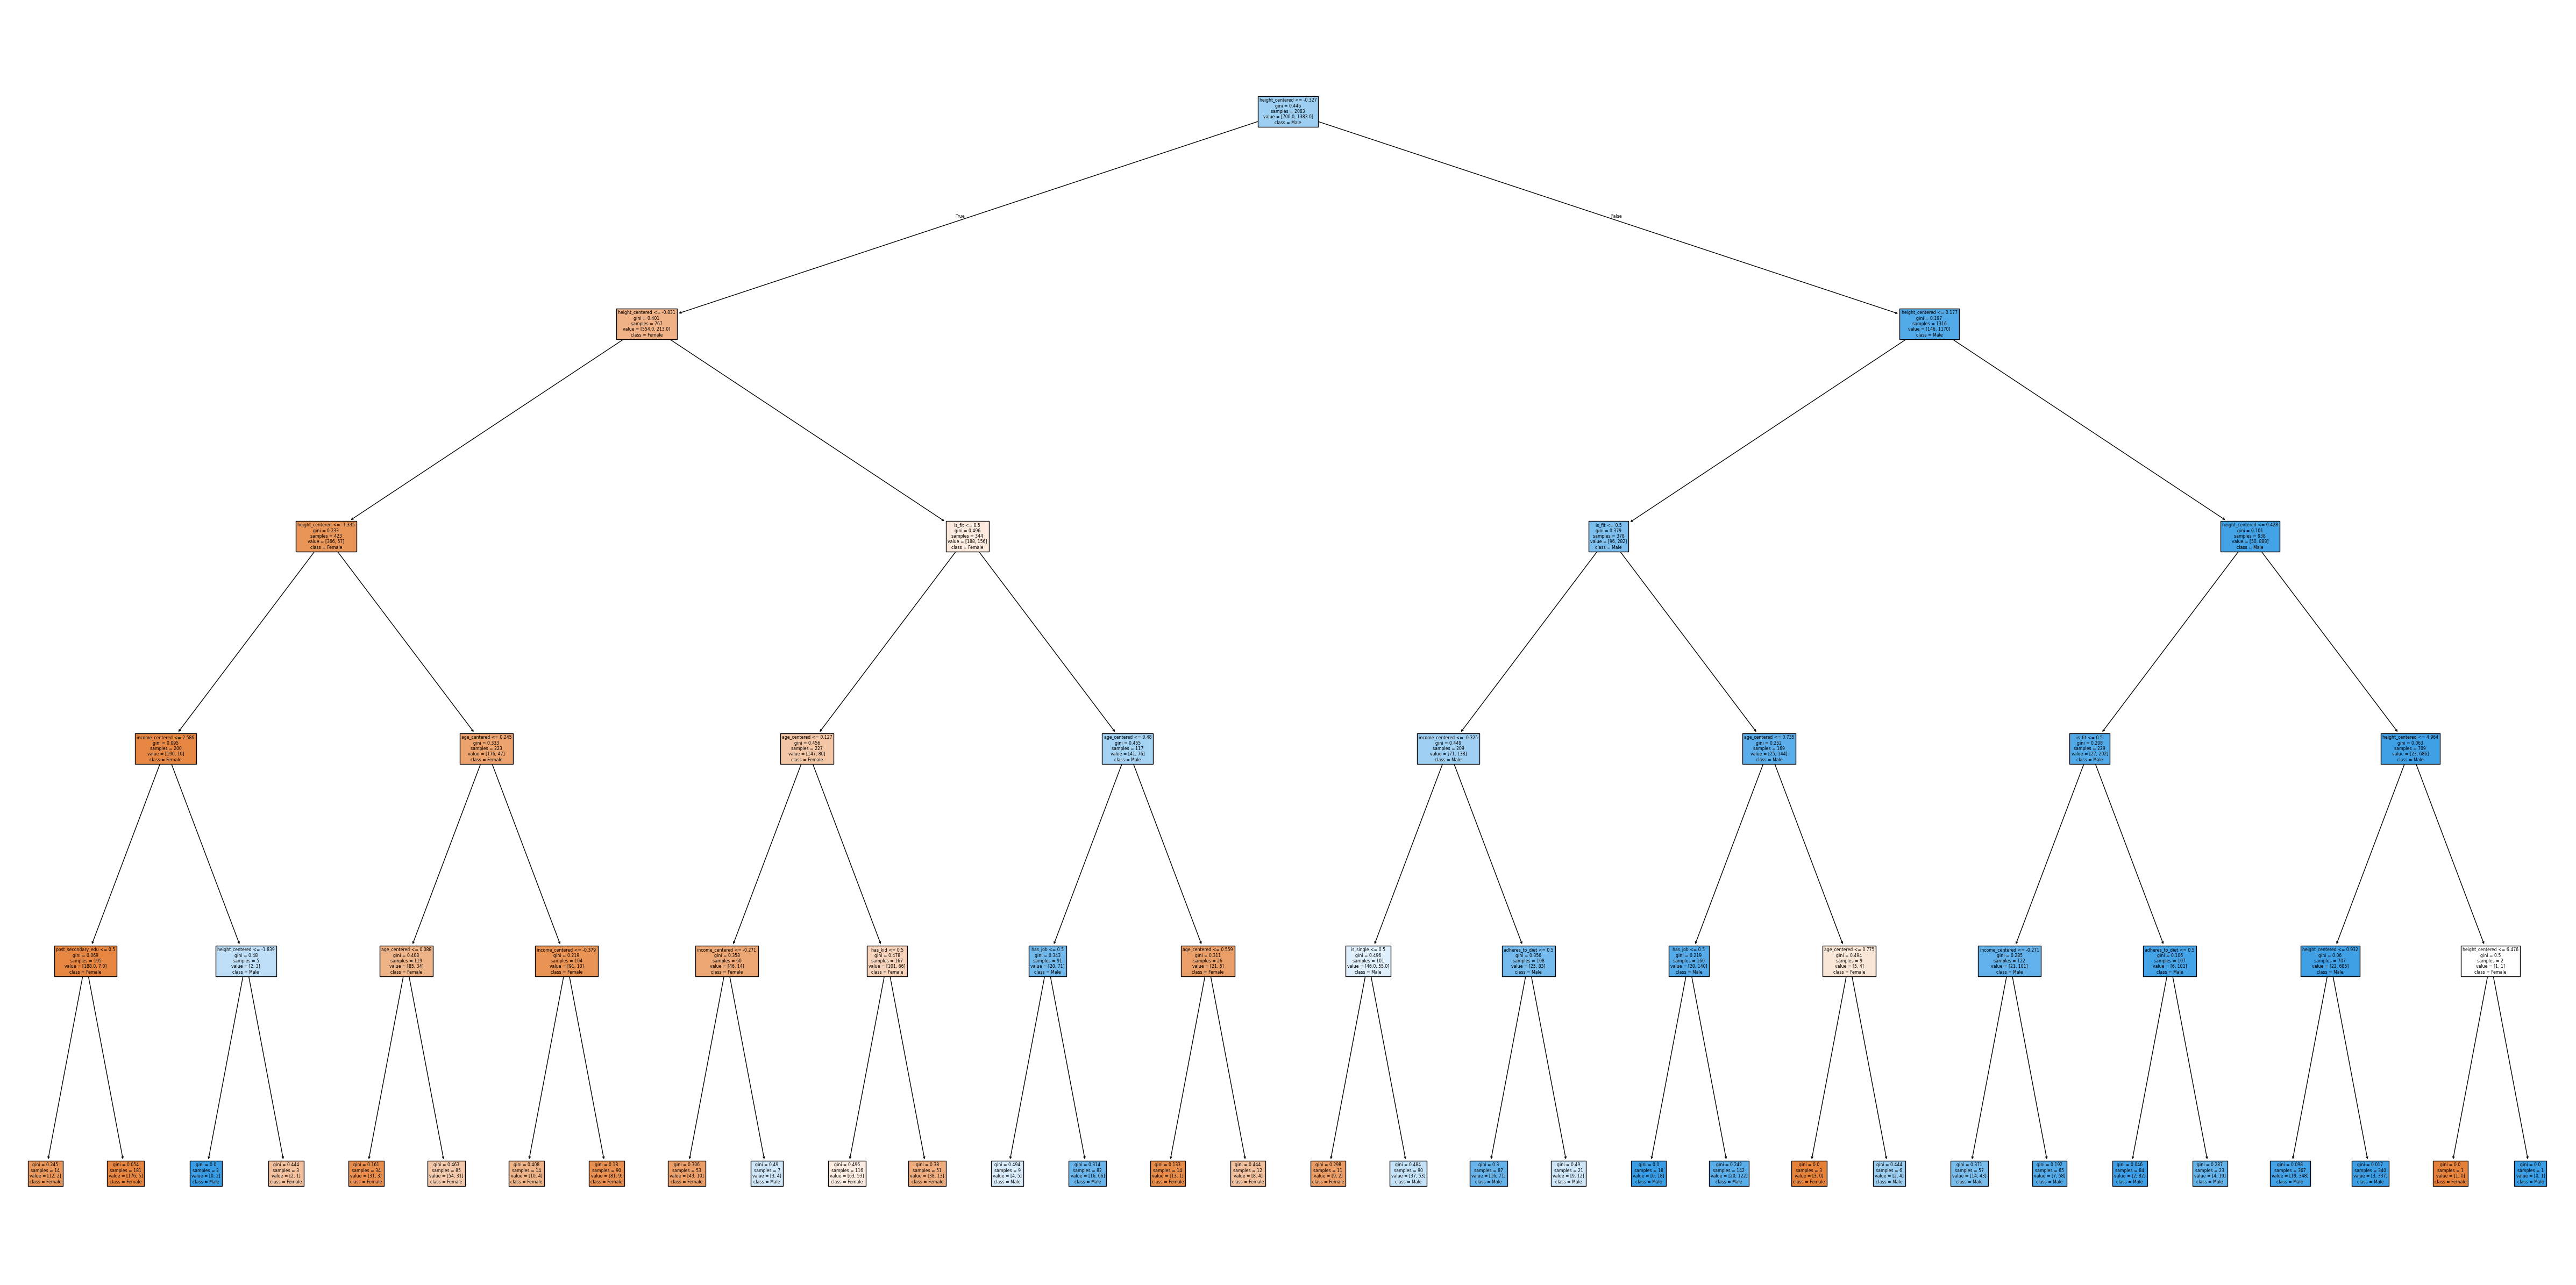

<Figure size 640x480 with 0 Axes>

In [96]:
# View the Decision Tree that was created
plt.figure(figsize=(48, 24))
tree.plot_tree(tree_classifier, 
               feature_names=X.columns, 
               class_names=['Female', 'Male'],
               filled=True)
plt.tight_layout()
plt.show()
plt.clf()

### Utilizing Feature Selection

#### Sequential Backward Selection

In [ ]:
# Give the Sequential Backward Selector 
# more predictor variables to work with
X2 = profile_data_2[['age_centered', 'height_centered',
       'income_centered', 'is_religious', 'is_drinker',
       'is_smoker', 'uses_drugs', 'post_secondary_edu',
       'adheres_to_diet', 'is_fit', 'has_job',
       'is_black', 'is_white', 'is_asian', 'is_hispanic_latin',
       'is_native_american', 'is_pacific_islander', 'is_indian',
       'is_middle_eastern', 'is_other', 'has_kid',
       'is_single', 'is_straight', 'is_gay', 'is_bisexual']]

Here are the 5 features chosen from sequential backward selection: ('height_centered', 'is_fit', 'is_black', 'is_white', 'is_bisexual')
Here is the accuracy score after sequential backward selection: 0.8594463310202274
The best accuracy score found during sequential backward selection is: 0.866746641074856
This score corresponds to 15 features.
Here are the 15 best features found during sequential backward selection:
('age_centered', 'height_centered', 'income_centered', 'is_religious', 'is_drinker', 'is_smoker', 'adheres_to_diet', 'is_fit', 'is_black', 'is_white', 'is_asian', 'is_hispanic_latin', 'is_native_american', 'is_middle_eastern', 'is_bisexual')


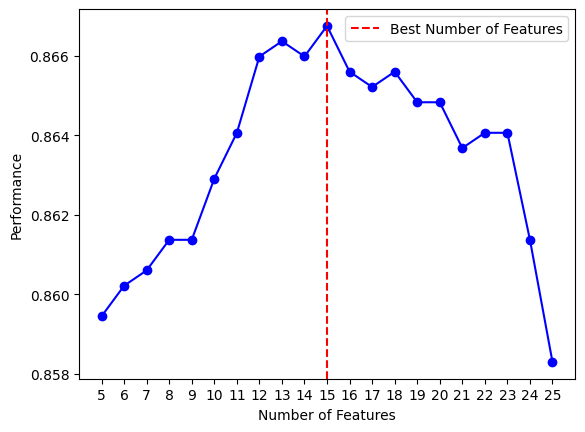

<Figure size 640x480 with 0 Axes>

In [98]:
# Instantiate new Logistic Regression Model 
# to be used in Sequential Backward Selection
logrm2 = LogisticRegression()
# Instantiate a Sequential Backward Selector 
# and allow it to choose the best features
num_features = 5
sbs = SFS(logrm2, k_features=num_features,
          forward=False, floating=False,
          scoring='accuracy')
sbs.fit(X2, y)
print(f"Here are the {num_features} features chosen from sequential backward selection: {sbs.subsets_[num_features]['feature_names']}")
print(f"Here is the accuracy score after sequential backward selection: {sbs.subsets_[num_features]['avg_score']}")
best_num_features = 0
best_score = 0
for outer_key, dict in sbs.get_metric_dict().items():
    for inner_key, value in dict.items():
        if inner_key == 'avg_score':
            if value > best_score:
                best_score = value
                best_num_features = outer_key
print(f"The best accuracy score found during sequential backward selection is: {best_score}")
print(f"This score corresponds to {best_num_features} features.")
print(f"Here are the {best_num_features} best features found during sequential backward selection:\n{sbs.subsets_[best_num_features]['feature_names']}")
# Visualize the feature selection process to see 
# the number of features that correspond to the best accuracy
plot_sfs(sbs.get_metric_dict(), kind=None)
plt.axvline(best_num_features, color='red',
            linestyle='dashed', label='Best Number of Features')
plt.legend()
plt.show()
plt.clf()

### Ensemble Methods

#### Random Forest Classifier

In [ ]:
# Select "best" predictor variables
X_best = profile_data_2[['age_centered', 'height_centered',
                    'income_centered', 'is_religious',
                    'is_drinker', 'is_smoker',
                    'adheres_to_diet', 'is_fit', 'is_black',
                    'is_white', 'is_asian', 'is_hispanic_latin',
                    'is_native_american', 'is_middle_eastern',
                    'is_bisexual']]

In [100]:
# Split data into training and test data
x_train_best, x_test_best, y_train_best, y_test_best = train_test_split(
    X_best, y, train_size=0.8, test_size=0.2, random_state=3)

In [ ]:
# Instantiate and train Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train_best, y_train_best)

RandomForestClassifier()

In [102]:
# Score train and test data
print(rf_classifier.score(x_train_best, y_train_best))
print(rf_classifier.score(x_test_best, y_test_best))

0.9951992318771004
0.8714011516314779


In [103]:
# Make predictions using the model
y_pred_rf = rf_classifier.predict(x_test_best)
# Calculate and print evaluation metrics
accuracy_rf = accuracy_score(y_test_best, y_pred_rf)
precision_rf = precision_score(y_test_best, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test_best, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test_best, y_pred_rf, average='weighted')
print(f"Accuracy Score: {accuracy_rf}")
print(f"Precision Score: {precision_rf}")
print(f"Recall Score: {recall_rf}")
print(f"F1 Score: {f1_rf}")

Accuracy Score: 0.8714011516314779
Precision Score: 0.8726744478044952
Recall Score: 0.8714011516314779
F1 Score: 0.8719493539415527


#### Stacking Classifier

In [104]:
# Employ previously used models as estimators for Stacking Model
level_0_estimators = {}
level_0_estimators['logrm'] = logrm
level_0_estimators['rf_classifier'] = rf_classifier
# Prepare to add new features to training dataset 
# based on each estimator's predictions
level_0_columns = [f"{name}_prediction" for name in level_0_estimators.keys()]
# Instantiate model that will make final predictions
level_1_estimator = RandomForestClassifier()
# Instantiate model that will be used for k-fold cross validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=3)

In [105]:
# Instantiate and train Stacking Classifier
stacking_classifier = StackingClassifier(estimators=list(level_0_estimators.items()), 
                                    final_estimator=level_1_estimator, 
                                    passthrough=True, cv=kfold,
                                    stack_method="predict_proba")
stacking_classifier.fit(x_test_best, y_test_best)

StackingClassifier(cv=StratifiedKFold(n_splits=10, random_state=3, shuffle=True),
                   estimators=[('logrm', LogisticRegression()),
                               ('rf_classifier', RandomForestClassifier())],
                   final_estimator=RandomForestClassifier(), passthrough=True,
                   stack_method='predict_proba')

In [106]:
# Score train and test data
print(stacking_classifier.score(x_train_best, y_train_best))
print(stacking_classifier.score(x_test_best, y_test_best))

0.8545367258761402
0.9596928982725528


In [107]:
# Make predictions using the model
y_pred_stack = stacking_classifier.predict(x_test_best)
# Calculate and print evaluation metrics
accuracy_stack = accuracy_score(y_test_best, y_pred_stack)
precision_stack = precision_score(y_test_best, y_pred_stack, average='weighted')
recall_stack = recall_score(y_test_best, y_pred_stack, average='weighted')
f1_stack = f1_score(y_test_best, y_pred_stack, average='weighted')
print(f"Accuracy Score: {accuracy_stack}")
print(f"Precision Score: {precision_stack}")
print(f"Recall Score: {recall_stack}")
print(f"F1 Score: {f1_stack}")

Accuracy Score: 0.9596928982725528
Precision Score: 0.9595839044813319
Recall Score: 0.9596928982725528
F1 Score: 0.9594322702312432


## Summary

&emsp;To start, all OKCupid user data was imported from `profiles.csv`, and the first 5 rows of data were previewed with the `.head()` method. From this preview, it is shown that there are 31 columns, each corresponding to a single feature of the data (such as age, body type, sex, income, etc.). Using the `.info()` method, it is also shown that data was gathered from **59,946** users. Unfortunately, there are a great deal of null, or empty, values in the data, because not all users wanted to answer all of the questions that OKCupid asked them.

&emsp;To make the data more useful for data analysis and machine learning models, some data cleaning and data wrangling had to be done. So, the first step taken was to remove the rows of data that represent users who did not input values for the following features: `height`, `ethnicity`, `religion`, `drinks`, `smokes`, `drugs`, `education`, `diet`, `body_type`, `job`, `offspring`, and `income`. Then, the `sex` feature was changed from using the strings `'f'` and `'m'` to using the numbers `0` and `1`, respectively. Next, `ethnicity` was broken into 8 separate features (`is_black`, `is_white`, `is_asian`, `is_hispanic_latin`, `is_native_american`, `is_pacific_islander`, `is_indian`, `is_middle_eastern`, `is_other`), and `orientation` was broken into 3 separate features (`is_straight`, `is_gay`, `is_bisexual`). Also, `religion`, `drinks`, `smokes`, `drugs`, `education`, `diet`, `body_type`, `job`, `offspring`, and `status` were changed to simpler binary features (`is_religious`, `is_drinker`, `is_smoker`, `uses_drugs`, `post_secondary_edu`, `adheres_to_diet`, `is_fit`, `has_job`, `has_kid`, `is_single`) that use `0`s and `1`s. Lastly, the `sign` feature was simplified to 12 possible responses, `age_group` was added as a feature, and `age`, `height`, & `income` were scaled down to ranges between -7 and 7 (instead of ranges up to 110 or 1,000,000) for machine learning.

&emsp;After data cleaning and wrangling, the `.info()` method was used again to see that there were only **2,604** users who provided answers to *every* feature used in this project. Fortunately, this number of users still provides a large enough sample to be representative of the full dataset. So, the data was almost ready for analysis at this point. The only thing left to do was to make male-only and female-only copies of the data for even easier analysis. On a side note, it is also learned that the data was collected between July 2011 and July 2012.

&emsp;From analysis of the data, many insights were gained. It is revealed that OKCupid had 67% males and 33% females, ranging in age from 18 to 69, with an average age of 33. Males had an average height of 5'10", while females averaged around 5'5". The Gender Wage Gap was also highlighted, with average pay for 18-19 year old females being <span>$</span>6,000 less than males in the same age group, but growing to be <span>$</span>45,000 less in the 30-39 year old age group. Furthermore, it is shown that 72% of users identified as White, 12% Asian, 10% Hispanic/Latino, and 8% Black. Religion played a role in only 60% of users' lives, while 92% of users drank alcoholic beverages. Around 49% of male users considered themselves fit, while only 23% of females would have said the same. 93% of users had some form of education after high school, and 86% of users were employed at the time. Only 20% of users had at least one child, with 26% of women being parents and only 18% of men. Overall, 89% of users identified as straight, but 17% of females identified as gay or bisexual, while only 7% of males did. Additionally, Cancer, Taurus, Pisces, Libra, and Capricorn were the top 5 Zodiac signs represented represented amongst users. *For more detailed analysis, including data visualizations, go to the Analyzing & Visualizing Data section of this project.*

&emsp;With data analysis complete, it was time to get into using some machine learning. For this project, the goal was to use different machine learning models in order to predict the sex of users based on their answers to the questions from the OKCupid app. First, 14 predictor variables were chosen (`age_centered`, `height_centered`, `income_centered`, `is_religious`, `is_drinker`,`is_smoker`, `uses_drugs`, `post_secondary_edu`, `adheres_to_diet`, `is_fit`, `has_job`, `has_kid`, `is_single`, `is_straight`) as a best guess for which features would help most with a machine learning model's predictions. Then, the data was split into a training set and testing set, which were used to train machine learning models and identify the levels of accuracy of their predictions. The first model used was a **K-Nearest Neighbors Classifier Model**, which learned to make predictions with 84.83% accuracy. Next, a **Logistic Regression Classifier Model** was used, and it learned to make predictions with 85.99% accuracy. Following this, a **Decision Tree Classifier Model** learned to make predictions with 86.56% accuracy. Then, a **Sequential Backward Selector** was used to see if better predictions could be made from picking its own predictor variables, and it chose 15 features (`age_centered`, `height_centered`, `income_centered`, `is_religious`, `is_drinker`,`is_smoker`, `adheres_to_diet`, `is_fit`, `is_black`, `is_white`, `is_asian`, `is_hispanic_latin`, `is_native_american`, `is_middle_eastern`, `is_bisexual`) that could be used by a **Logistic Regression Classifier Model** to make predictions with 86.67% accuracy. Finally, a **Random Forest Classifier Model** was trained to make predictions with 87.14% accuracy, and a **Stacking Classifier Model** was trained to make predictions with **95.97%** accuracy. *For  a more detailed look and the machine learning used in this project, go to the Applying Machine Learning to Data section.*

&emsp;In conclusion, this project provides a thorough analysis and numerous visualizations of data from the OKCupid dating app. It also explores various differences between female and male users of the app. In addition, it uses machine learning models in order to predict the sex of users based on their answers to specific questions. Many insights were gained from this project, all starting with Python code and 1 data file.